In [2]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans
from scipy import stats
import pandas as pdrestar
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.cm as cm
#from sklearn_extra.cluster import KMedoids
#from sklearn_extra.kernel_methods import EigenProRegressor

In [3]:
# If you saved as CSV:
df = pd.read_csv(r"C:\Users\sacar\OneDrive\Documents\Semester 1 NOVA\03_Data_Mining\Project\GitHub\DM_Group50\DM50\processed_ABCDEats_data.csv")

# Or if you saved as pickle:
#df = pd.read_pickle('processed_ABCDEats_data.pkl')

df_original =  pd.read_csv(r"C:\Users\sacar\OneDrive\Documents\Semester 1 NOVA\03_Data_Mining\Project\GitHub\DM_Group50\DM50\original_ABCDEats_data.csv")

C:\Users\sacar\AppData\Local\Temp\ipykernel_22276\2944022070.py:7: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df_original =  pd.read_csv(r"C:\Users\sacar\OneDrive\Documents\Semester 1 NOVA\03_Data_Mining\Project\GitHub\DM_Group50\DM50\original_ABCDEats_data.csv")


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31737 entries, 0 to 31736
Data columns (total 72 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               31737 non-null  object 
 1   customer_region           31737 non-null  object 
 2   customer_age              31737 non-null  int64  
 3   vendor_count              31737 non-null  int64  
 4   product_count             31737 non-null  int64  
 5   is_chain                  31737 non-null  int64  
 6   first_order               31737 non-null  int64  
 7   last_order                31737 non-null  int64  
 8   last_promo                31737 non-null  object 
 9   payment_method            31737 non-null  object 
 10  CUI_American              31737 non-null  int64  
 11  CUI_Asian                 31737 non-null  int64  
 12  CUI_Beverages             31737 non-null  int64  
 13  CUI_Cafe                  31737 non-null  int64  
 14  CUI_Ch

In [5]:
#Select numeric data types
df_numeric = df.select_dtypes(include=[np.number])

In [6]:
#Select numeric data types for original
df_numeric_original = df_original.select_dtypes(include=[np.number])

In [7]:
# Identify columns that start with 'HR_', 'DOW_', or 'CUI_', we summed them to new features
columns_to_drop = df_numeric.filter(like='HR_').columns.tolist() + \
                  df_numeric.filter(like='DOW_').columns.tolist() #+ \
                 # ['CUI_Japanese', 'CUI_Chinese', 'CUI_Indian', 'CUI_Thai', 'CUI_Desserts', 'CUI_Cafe', 'CUI_Street Food / Snacks', 'CUI_Beverages','CUI_Asian','CUI_OTHER']
# Print the columns to be dropped for verification
print("Columns to be dropped:", columns_to_drop)

# Drop the identified columns from the copied DataFrame
df_new = df_numeric.drop(columns=columns_to_drop)

# Display the resulting DataFrame
df_new

Columns to be dropped: ['HR_0', 'HR_1', 'HR_2', 'HR_3', 'HR_4', 'HR_5', 'HR_6', 'HR_7', 'HR_8', 'HR_9', 'HR_10', 'HR_11', 'HR_12', 'HR_13', 'HR_14', 'HR_15', 'HR_16', 'HR_17', 'HR_18', 'HR_19', 'HR_20', 'HR_21', 'HR_22', 'HR_23', 'DOW_0', 'DOW_1', 'DOW_2', 'DOW_3', 'DOW_4', 'DOW_5', 'DOW_6']


,customer_age,vendor_count,product_count,is_chain,first_order,last_order,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,...,weekend_orders,underweekend_orders,weekend_ratio,lunch_orders,dinner_orders,morning_orders,midday_orders,evening_orders,night_orders,drinking_orders
0,18,2,5,1,0,1,0,0,0,0,...,2,0,1.0,0,2,0,0,2,0,0
1,17,2,2,2,0,1,12,6,0,0,...,2,0,1.0,1,0,1,1,0,0,0
2,38,1,2,2,0,1,9,0,0,0,...,2,0,1.0,1,0,1,1,0,0,0
3,24,2,3,1,0,2,0,13,0,0,...,1,1,0.5,1,0,0,2,0,0,0
4,20,2,5,0,0,2,14,40,0,0,...,1,1,0.5,0,0,2,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31732,30,1,1,1,34,0,0,0,18,0,...,1,0,1.0,1,0,0,1,0,0,0
31733,27,1,1,0,28,0,18,0,0,0,...,1,0,1.0,0,0,0,0,1,0,0
31734,24,1,1,1,12,0,0,0,0,0,...,1,0,1.0,0,0,0,0,0,0,1
31735,34,1,1,0,7,0,0,12,0,0,...,1,0,1.0,1,0,0,1,0,0,0


In [8]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31737 entries, 0 to 31736
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_age              31737 non-null  int64  
 1   vendor_count              31737 non-null  int64  
 2   product_count             31737 non-null  int64  
 3   is_chain                  31737 non-null  int64  
 4   first_order               31737 non-null  int64  
 5   last_order                31737 non-null  int64  
 6   CUI_American              31737 non-null  int64  
 7   CUI_Asian                 31737 non-null  int64  
 8   CUI_Beverages             31737 non-null  int64  
 9   CUI_Cafe                  31737 non-null  int64  
 10  CUI_Chicken Dishes        31737 non-null  int64  
 11  CUI_Chinese               31737 non-null  int64  
 12  CUI_Desserts              31737 non-null  int64  
 13  CUI_Healthy               31737 non-null  int64  
 14  CUI_In

In [9]:

#Scale numeric features

# Initialize the scaler
scaler = StandardScaler()

#Scale the original numeric features
df_scaled_original = scaler.fit_transform(df_numeric_original)

# Convert the scaled array back to a DataFrame
df_scaled_original = pd.DataFrame(df_scaled_original, columns=df_numeric_original.columns, index=df_numeric_original.index)


#Scale the processed numeric features
df_scaled_new = scaler.fit_transform(df_new)

# Convert the scaled array back to a DataFrame
df_scaled_new = pd.DataFrame(df_scaled_new, columns=df_new.columns, index=df_new.index)

In [10]:
df_scaled_new.head()

,customer_age,vendor_count,product_count,is_chain,first_order,last_order,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,...,weekend_orders,underweekend_orders,weekend_ratio,lunch_orders,dinner_orders,morning_orders,midday_orders,evening_orders,night_orders,drinking_orders
0,-1.338044,-0.402940,-0.099538,-0.459198,-1.181245,-2.707106,-0.410078,-0.418056,-0.265138,-0.12277,...,0.413359,-0.827803,2.273273,-0.517547,0.757104,-0.463208,-0.615700,0.204674,-0.276604,-0.362107
1,-1.478899,-0.402940,-0.530395,-0.208168,-1.181245,-2.707106,0.630296,-0.162487,-0.265138,-0.12277,...,0.413359,-0.827803,2.273273,0.037177,-0.434062,0.084697,-0.184514,-0.582069,-0.276604,-0.362107
2,1.479045,-0.763931,-0.530395,-0.208168,-1.181245,-2.707106,0.370202,-0.418056,-0.265138,-0.12277,...,0.413359,-0.827803,2.273273,0.037177,-0.434062,0.084697,-0.184514,-0.582069,-0.276604,-0.362107
3,-0.492917,-0.402940,-0.386776,-0.459198,-1.181245,-2.663969,-0.410078,0.135676,-0.265138,-0.12277,...,-0.149654,-0.562671,0.672111,0.037177,-0.434062,-0.463208,0.246671,-0.582069,-0.276604,-0.362107
4,-1.056335,-0.402940,-0.099538,-0.710229,-1.181245,-2.663969,0.803692,1.285734,-0.265138,-0.12277,...,-0.149654,-0.562671,0.672111,-0.517547,-0.434062,0.632602,-0.615700,-0.582069,-0.276604,-0.362107


# Time of Day of Orders

In [11]:

time_of_order_features = df_scaled_new[['morning_orders', 'midday_orders', 'evening_orders', 'night_orders', 'drinking_orders']]

In [12]:
#K-means with numeric features finding the best number of clusters
range_clusters = range(1, 11)

inertia = []
for n_clus in range_clusters:  # iterate over desired ncluster range
    kmclust = KMeans(n_clusters=n_clus, init='k-means++', n_init=15, random_state=42)
    kmclust.fit(time_of_order_features)
    inertia.append(kmclust.inertia_)  # save the inertia of the given cluster solution

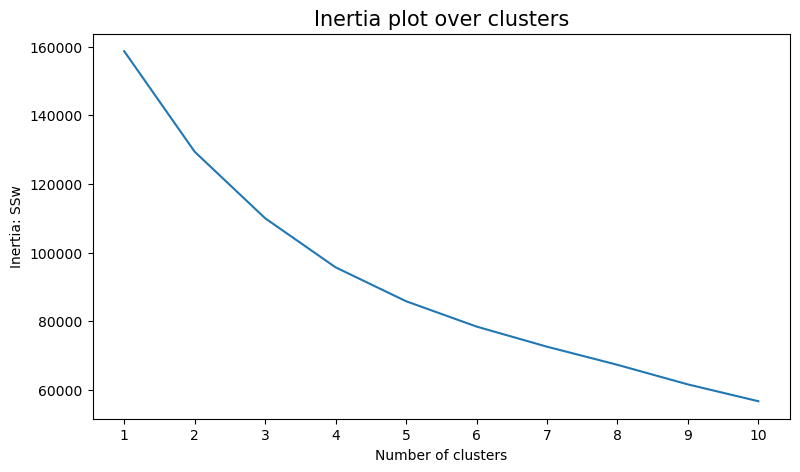

In [13]:
# The inertia plot for time of order features

fig, ax = plt.subplots(figsize=(9,5))

ax.plot(range_clusters, inertia)
ax.set_xticks(range_clusters)
ax.set_ylabel("Inertia: SSw")
ax.set_xlabel("Number of clusters")
ax.set_title("Inertia plot over clusters", size=15)

plt.show()

For n_clusters = 2, the average silhouette_score is : 0.6139707012685283
For n_clusters = 3, the average silhouette_score is : 0.4798580920969515
For n_clusters = 4, the average silhouette_score is : 0.545345022050105
For n_clusters = 5, the average silhouette_score is : 0.4917323614963601
For n_clusters = 6, the average silhouette_score is : 0.39977848020513695
For n_clusters = 7, the average silhouette_score is : 0.4326193513699986
For n_clusters = 8, the average silhouette_score is : 0.39133092690018717
For n_clusters = 9, the average silhouette_score is : 0.40770714479350917
For n_clusters = 10, the average silhouette_score is : 0.34727712785013765


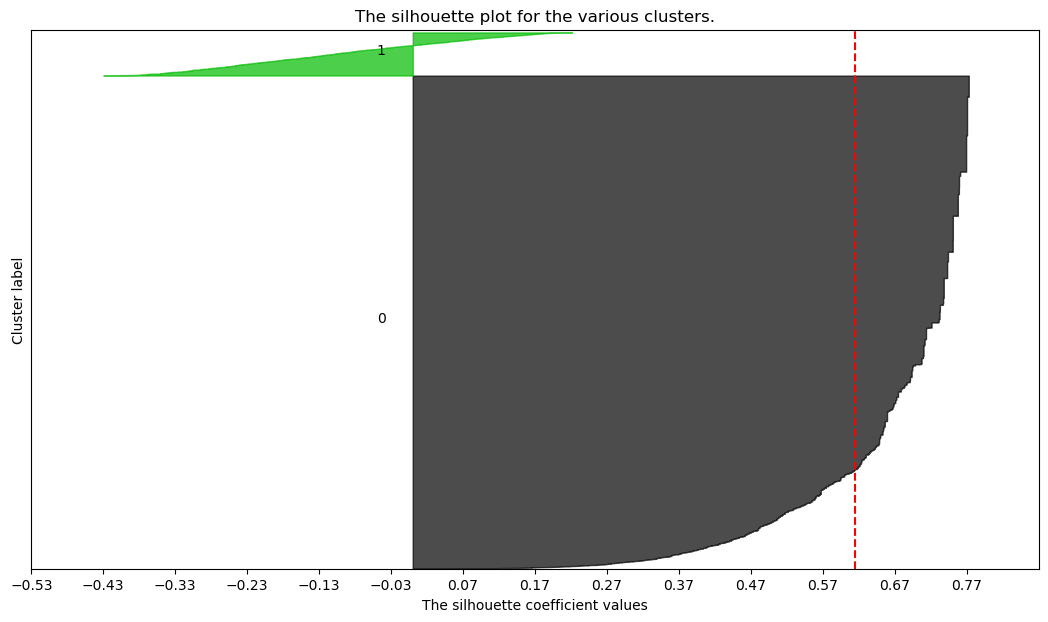

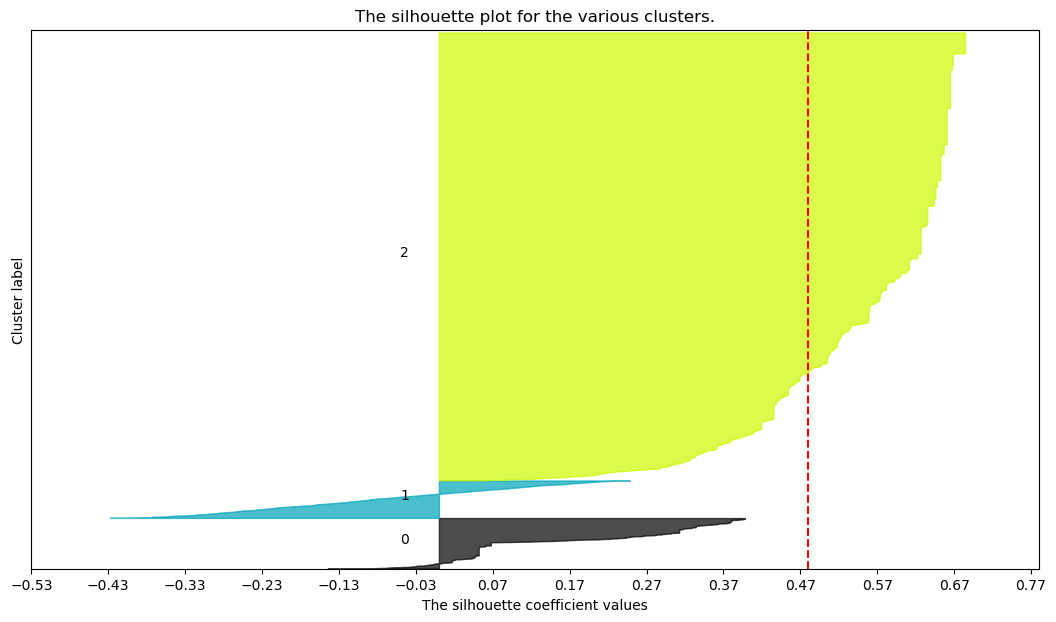

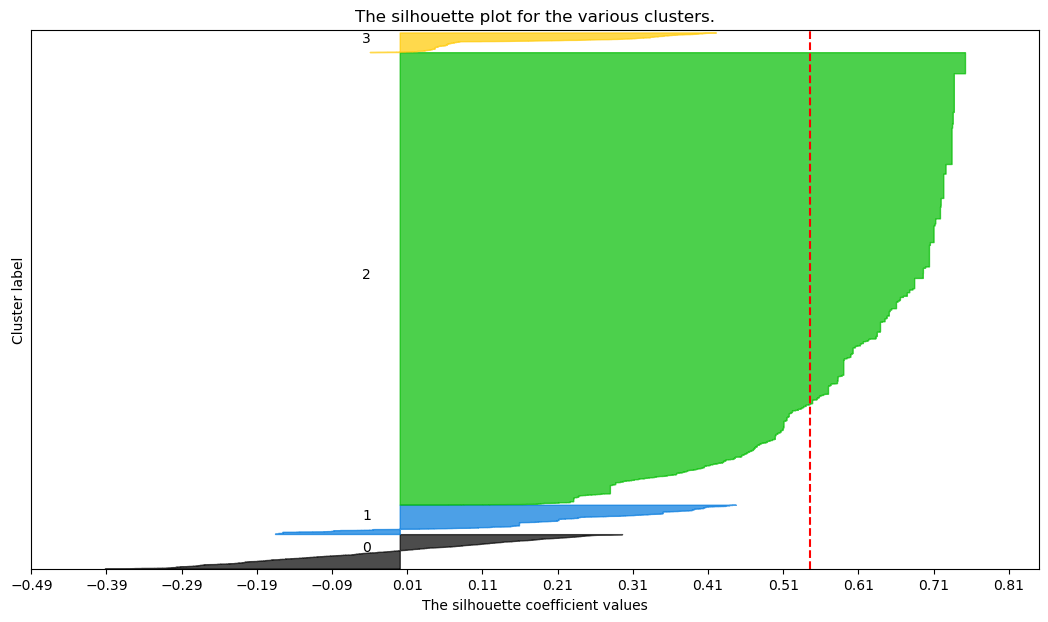

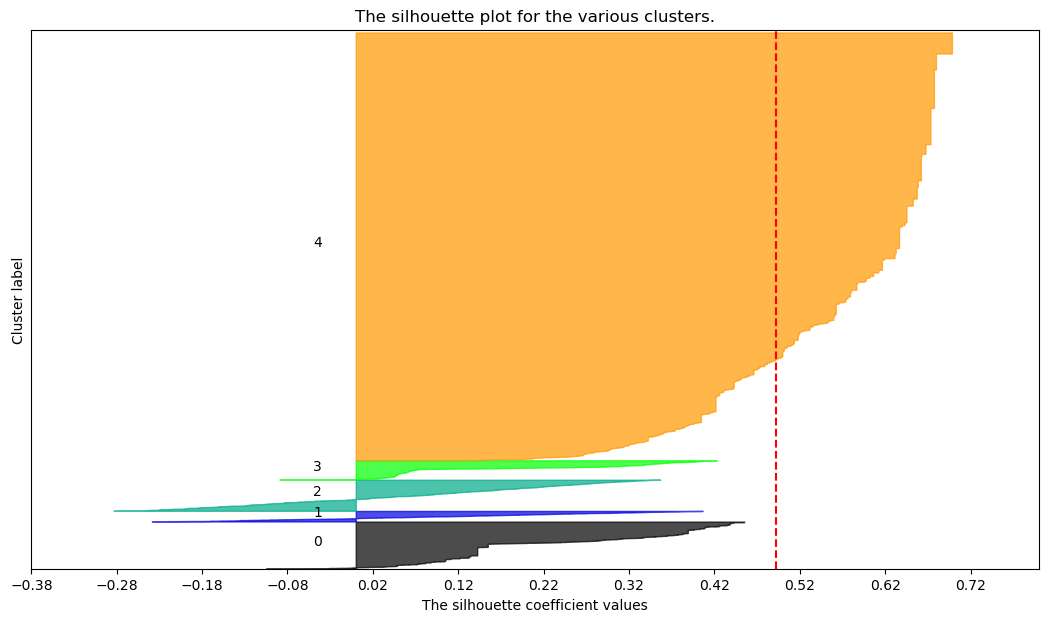

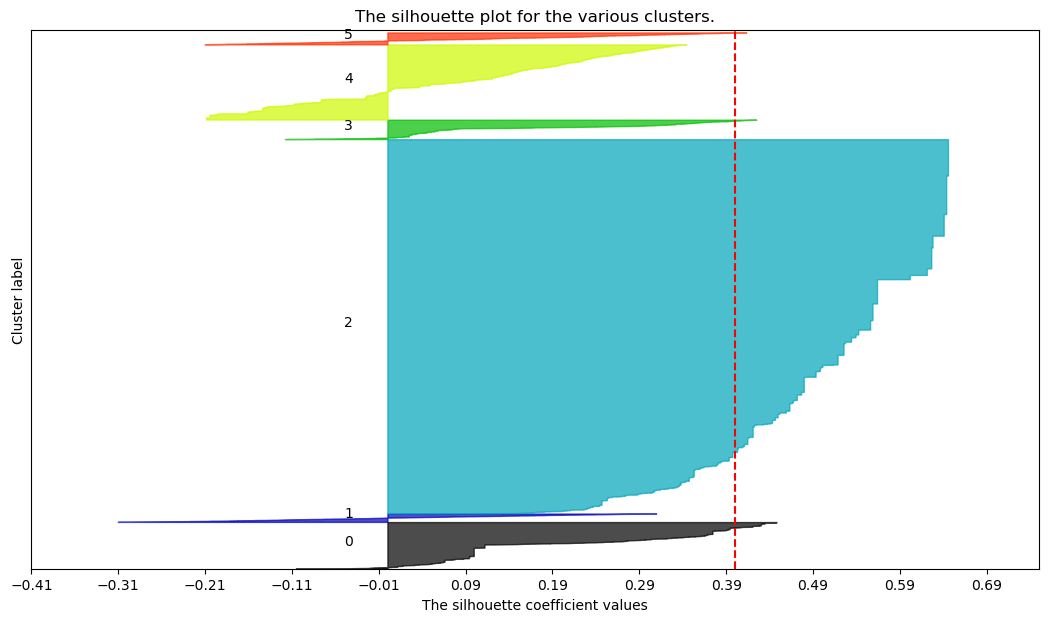

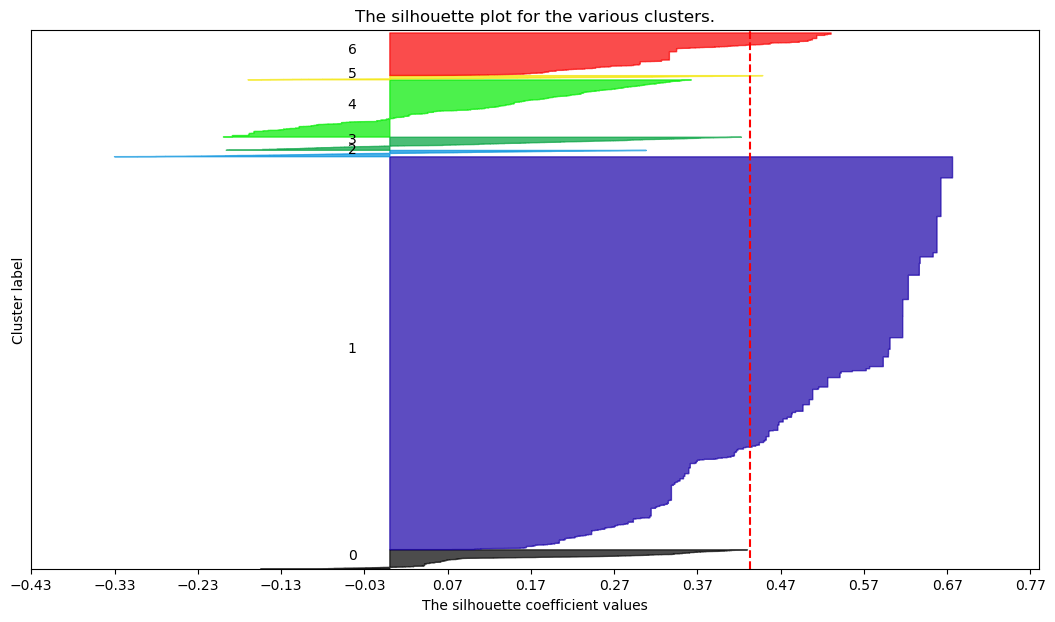

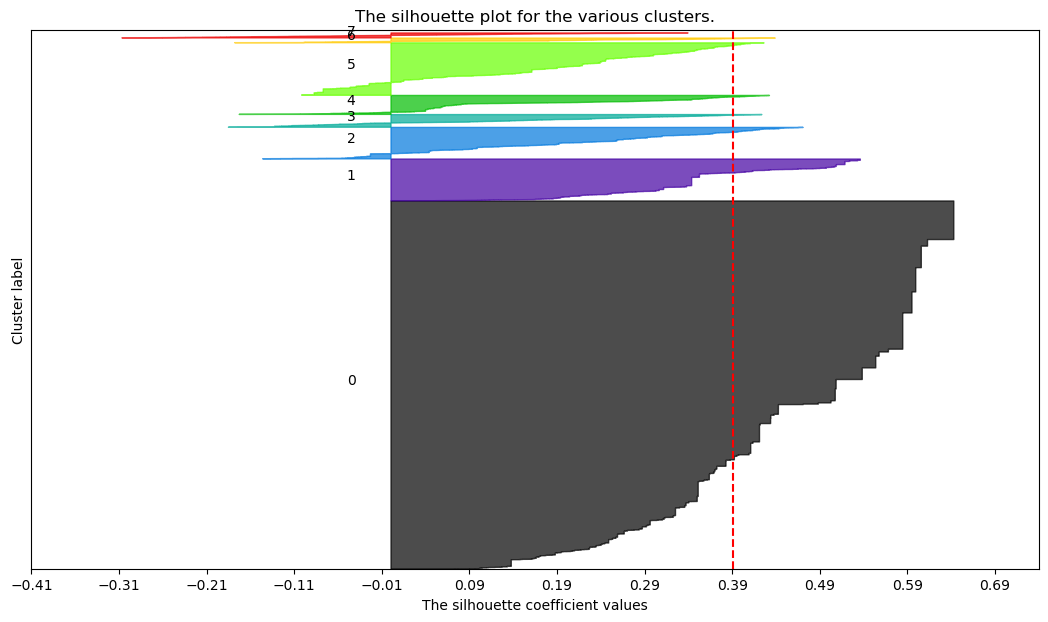

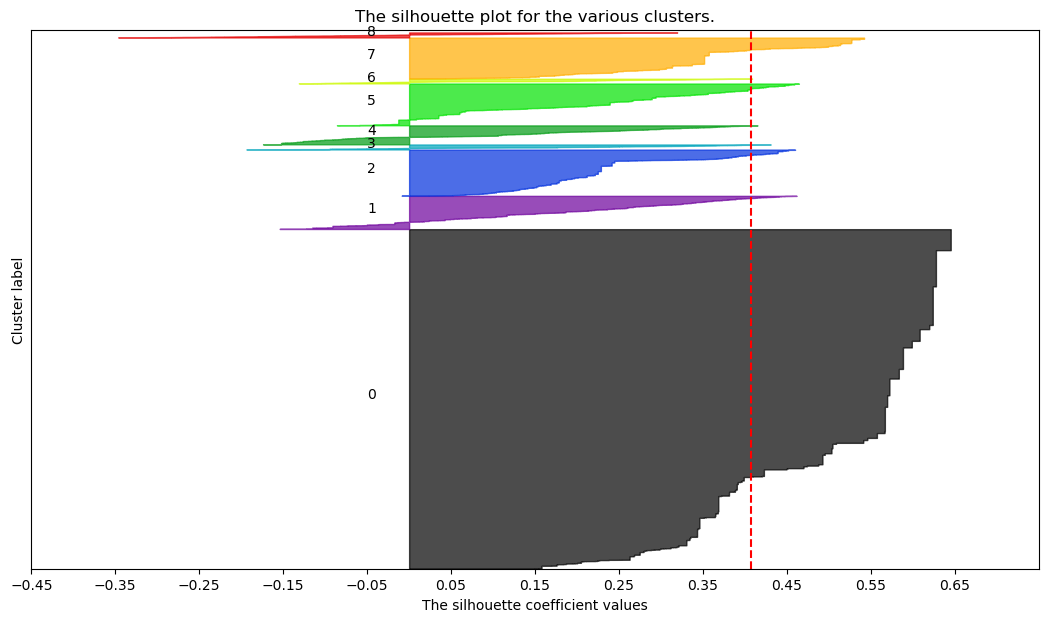

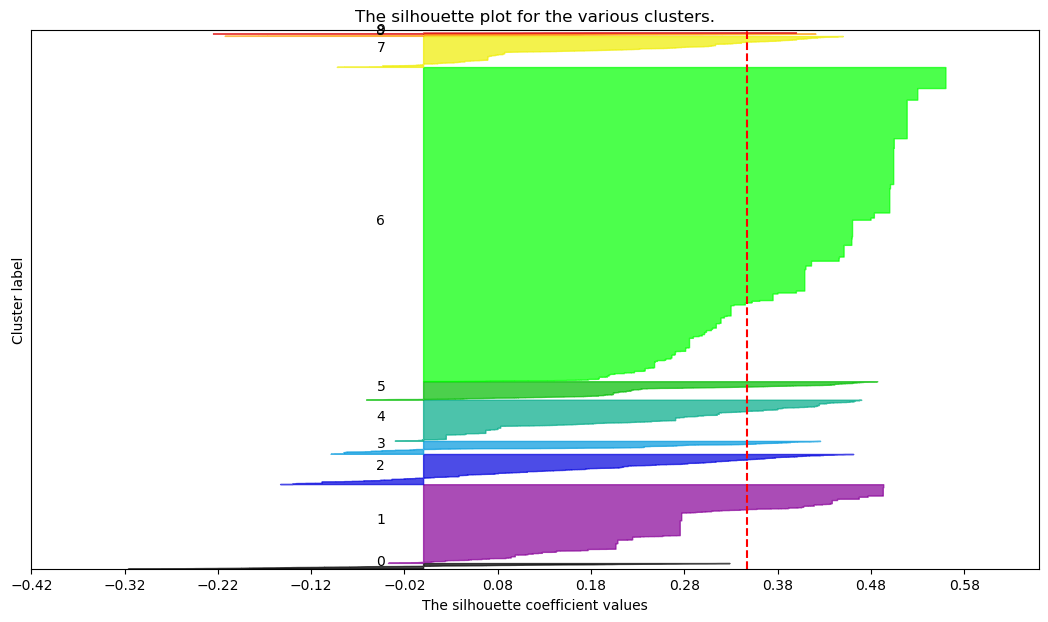

In [14]:
# Adapted from:
# https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html#sphx-glr-auto-examples-cluster-plot-kmeans-silhouette-analysis-py

# Storing average silhouette metric for time of order features
avg_silhouette = []
for nclus in range_clusters:
    # Skip nclus == 1
    if nclus == 1:
        continue
    
    # Create a figure
    fig = plt.figure(figsize=(13, 7))

    # Initialize the KMeans object with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    kmclust = KMeans(n_clusters=nclus, init='k-means++', n_init=15, random_state=1)
    cluster_labels = kmclust.fit_predict(time_of_order_features)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed clusters
    silhouette_avg = silhouette_score(time_of_order_features, cluster_labels)
    avg_silhouette.append(silhouette_avg)
    print(f"For n_clusters = {nclus}, the average silhouette_score is : {silhouette_avg}")

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(time_of_order_features, cluster_labels)

    y_lower = 10
    for i in range(nclus):
        # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        
        # Get y_upper to demarcate silhouette y range size
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        
        # Filling the silhouette
        color = cm.nipy_spectral(float(i) / nclus)
        plt.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    plt.title("The silhouette plot for the various clusters.")
    plt.xlabel("The silhouette coefficient values")
    plt.ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    plt.axvline(x=silhouette_avg, color="red", linestyle="--")
    
    # The silhouette coefficient can range from -1, 1
    xmin, xmax = np.round(sample_silhouette_values.min() -0.1, 2), np.round(sample_silhouette_values.max() + 0.1, 2)
    plt.xlim([xmin, xmax])
    
    # The (nclus+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    plt.ylim([0, len(df_scaled_original) + (nclus + 1) * 10])

    plt.yticks([])  # Clear the yaxis labels / ticks
    plt.xticks(np.arange(xmin, xmax, 0.1))

In [16]:
#K-means with K=2 for time of day columns
kmclust = KMeans(n_clusters=2, init='k-means++', n_init=15, random_state=1)
kmclust.fit(time_of_order_features)
km_labels = kmclust.fit_predict(time_of_order_features)

# Characterizing the final clusters
df_concat = pd.concat((time_of_order_features, pd.Series(km_labels, name='labels', index=time_of_order_features.index)), axis=1)
df_concat.groupby('labels').mean()

,morning_orders,midday_orders,evening_orders,night_orders,drinking_orders
labels,,,,,
0,-0.114482,-0.179566,-0.168307,-0.082930,-0.007075
1,1.311462,2.057042,1.928068,0.950017,0.081051


# Analysis: Clusters: High spenders/low spenders across all periods of the day.

In [12]:
#K-means with K=4 for time of day columns
kmclust = KMeans(n_clusters=4, init='k-means++', n_init=15, random_state=1)
kmclust.fit(time_of_order_features)
km_labels = kmclust.fit_predict(time_of_order_features)

# Characterizing the final clusters
df_concat_time_of_order = pd.concat((time_of_order_features, pd.Series(km_labels, name='labels', index=time_of_order_features.index)), axis=1)
df_concat_time_of_order.groupby('labels').mean()

,morning_orders,midday_orders,evening_orders,night_orders,drinking_orders
labels,,,,,
0,1.301696,2.316109,2.219957,0.090616,-0.272623
1,0.693304,-0.154906,-0.513519,0.003491,3.110265
2,-0.141505,-0.171163,-0.148221,-0.169152,-0.186247
3,-0.054049,0.115199,0.289718,3.740848,0.136044


# Analysis: Excellent clusters. 1) High spenders for morning/midday evening, 2) High spenders for drinking orders, 3) Generally low spenders, 4) High spenders for night_orders


# Cuisine Preference Clustering (original w/ PCA)

In [11]:
cui_features = df_scaled_new[['CUI_Japanese', 'CUI_Chinese', 'CUI_Indian', 'CUI_Thai', 'CUI_Desserts', 'CUI_Cafe', 'CUI_Street Food / Snacks', 'CUI_Beverages','CUI_Asian','CUI_OTHER']]

In [14]:
# Use PCA to reduce dimensionality of data
pca = PCA()
pca_feat = pca.fit_transform(cui_features)
pca_feat  

array([[ 1.05228776, -0.5572159 , -1.06349912, ...,  0.95359149,
        -0.14054738,  0.53661054],
       [-0.14186991, -0.63175178, -0.01389621, ...,  0.02096669,
         0.15230997,  0.06991338],
       [-0.06248433, -0.75273931,  0.02211549, ...,  0.01009324,
        -0.03074076,  0.12268839],
       ...,
       [-0.93824223,  0.34602493, -0.10957459, ...,  0.33779528,
        -0.05657773,  0.22263759],
       [-0.2212555 , -0.51076425, -0.04990791, ...,  0.03184013,
         0.3353607 ,  0.01713837],
       [-0.06248433, -0.75273931,  0.02211549, ...,  0.01009324,
        -0.03074076,  0.12268839]])

In [15]:
# Get PCA output as table

# Get the eigenvalues (explained variance)
explained_variance = pca.explained_variance_

# Get the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# get the cumulative explained variance ratio 
# Hint: use np.cumsum()
cumulative_explained_variance_ratio = np.cumsum(explained_variance_ratio)

# Combine into a dataframe
pca_results = pd.DataFrame(
    {
        "Eigenvalue": explained_variance,
        "Difference": np.insert(np.diff(explained_variance), 0, 0),
        "Proportion": explained_variance_ratio,
        "Cumulative": cumulative_explained_variance_ratio
    },
        index=range(1, pca.n_components_ + 1)
)

pca_results

,Eigenvalue,Difference,Proportion,Cumulative
1,1.455321,0.000000,0.145528,0.145528
2,1.336088,-0.119234,0.133605,0.279132
3,1.025878,-0.310210,0.102585,0.381717
4,0.968269,-0.057609,0.096824,0.478541
5,0.956680,-0.011589,0.095665,0.574206
6,0.921877,-0.034803,0.092185,0.666390
7,0.895620,-0.026257,0.089559,0.755949
8,0.870911,-0.024709,0.087088,0.843038
9,0.805905,-0.065005,0.080588,0.923626
10,0.763767,-0.042138,0.076374,1.000000


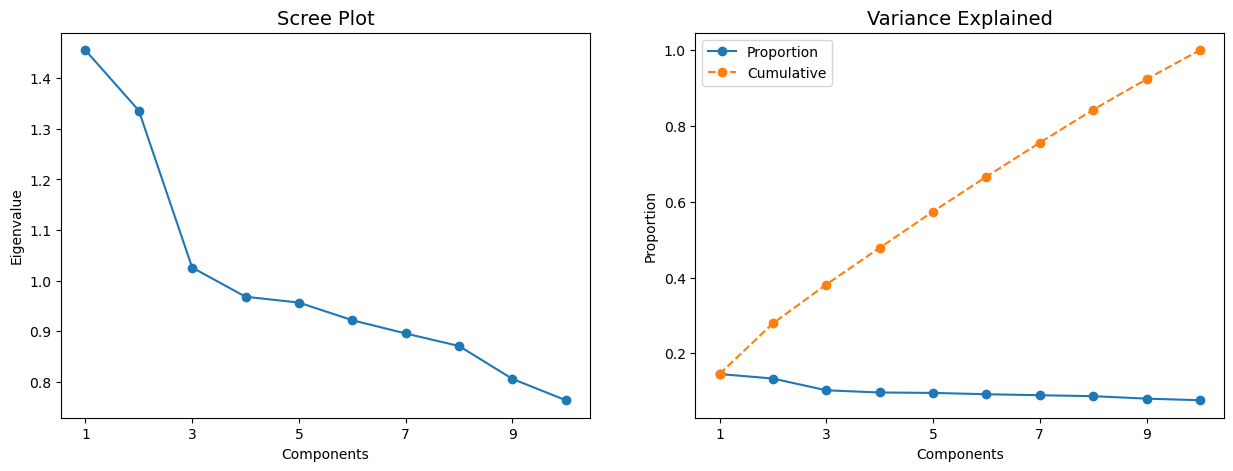

In [16]:
# figure and axes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# draw plots

ax1.plot(explained_variance, # PLOT THE EIGENVALUES (EXPLAINED VARIANCE)
         marker=".", markersize=12)

ax2.plot(explained_variance_ratio,  # PLOT THE EXPLAINED VARIANCE RATIO
         marker=".", markersize=12, label="Proportion")

ax2.plot(cumulative_explained_variance_ratio,  # PLOT THE CUMULATIVE EXPLAINED VARIANCE RATIO
         marker=".", markersize=12, linestyle="--", label="Cumulative")

# customizations
ax2.legend()
ax1.set_title("Scree Plot", fontsize=14)
ax2.set_title("Variance Explained", fontsize=14)
ax1.set_ylabel("Eigenvalue")
ax2.set_ylabel("Proportion")
ax1.set_xlabel("Components")
ax2.set_xlabel("Components")
ax1.set_xticks(range(0, pca.n_components_, 2))
ax1.set_xticklabels(range(1, pca.n_components_ + 1, 2))
ax2.set_xticks(range(0, pca.n_components_, 2))
ax2.set_xticklabels(range(1, pca.n_components_ + 1, 2))

plt.show()

In [18]:
# Perform PCA again with the number of principal components you want to retain
pca = PCA(n_components=4)
pca_feat = pca.fit_transform(cui_features)
pca_feat_names = [f"PC{i}" for i in range(pca.n_components_)]

# remember index=df_pca.index
pca_df = pd.DataFrame(pca_feat, index=cui_features.index, columns=pca_feat_names)  
pca_df

,PC0,PC1,PC2,PC3
0,1.052288,-0.557216,-1.063499,-1.833791
1,-0.141870,-0.631752,-0.013896,0.120904
2,-0.062484,-0.752739,0.022115,0.103349
3,0.442339,-0.371889,-0.715033,-1.034736
4,-0.591722,0.053844,-0.217962,0.220383
...,...,...,...,...
31732,-0.489499,-0.143897,0.916754,-0.903647
31733,-0.062484,-0.752739,0.022115,0.103349
31734,-0.938242,0.346025,-0.109575,-1.107053
31735,-0.221255,-0.510764,-0.049908,0.138459


In [21]:
#K-means with K=4 for time of day columns
kmclust = KMeans(n_clusters=4, init='k-means++', n_init=15, random_state=1)
kmclust.fit(pca_df)
km_labels = kmclust.fit_predict(pca_df)

# Characterizing the final clusters
df_concat = pd.concat((pca_df, pd.Series(km_labels, name='labels', index=pca_df.index)), axis=1)
df_concat.groupby('labels').mean()

,PC0,PC1,PC2,PC3
labels,,,,
0,0.039942,-0.318515,0.052313,0.033635
1,-2.114323,2.650446,1.633299,-2.331662
2,4.027894,2.224996,-0.688336,-1.168314
3,-1.257925,1.700789,-0.868872,0.888226


# Analysis: Some info on different cuisines... but not that good. Dominated by Asian cuisines and drinks really
From ChatGPT:
Cluster Interpretation with Features
Based on the correlations and cluster centers:

Cluster 0 (Balanced cluster): Contains entities with moderate values across features.
Cluster 1 (PC1- and PC2-dominant): Likely represents entities with strong contributions from features like CUI_Asian, CUI_Street Food / Snacks, and CUI_Chinese.
Cluster 2 (PC0-dominant): Includes entities strongly influenced by CUI_OTHER, CUI_Thai, and slightly CUI_Cafe.
Cluster 3 (PC1-focus): Features such as CUI_Asian and CUI_Japanese might drive this cluster.

In [25]:
# Project the data onto the PCs
X_pca = pca.transform(cui_features)
X_pca_df = pd.DataFrame(X_pca, columns=[f'PC{i}' for i in range(pca.n_components_)])

# Correlate original features with principal components
correlations = pd.DataFrame(
    np.dot(cui_features.T, X_pca_df) / (cui_features.shape[0] - 1),
    index=cui_features.columns,
    columns=[f'PC{i}' for i in range(pca.n_components_)]
)

print("Feature-PC Correlations:")
print(correlations)


Feature-PC Correlations:
                               PC0       PC1       PC2       PC3
CUI_Japanese              0.123132  0.514591 -0.317653  0.492267
CUI_Chinese               0.197066  0.384772  0.695643  0.289558
CUI_Indian                0.426853  0.068733 -0.293025 -0.493503
CUI_Thai                  0.582133  0.303449  0.187315  0.024525
CUI_Desserts             -0.389416  0.448549 -0.041278 -0.358093
CUI_Cafe                  0.560971  0.388822 -0.321611 -0.043696
CUI_Street Food / Snacks -0.526691  0.491139 -0.184564  0.053652
CUI_Beverages            -0.289521  0.378982  0.427584 -0.454257
CUI_Asian                -0.452057  0.632512 -0.144555  0.066511
CUI_OTHER                 0.714819  0.371720  0.061053 -0.153083


# Order Volume Features

In [21]:
order_volume_features = df_scaled_new[['vendor_count', 'product_count', 'total_spending', 'total_orders']]

In [35]:
#K-means with order_volume features finding the best number of clusters
range_clusters = range(1, 11)

inertia = []
for n_clus in range_clusters:  # iterate over desired ncluster range
    kmclust = KMeans(n_clusters=n_clus, init='k-means++', n_init=15, random_state=42)
    kmclust.fit(order_volume_features)
    inertia.append(kmclust.inertia_)  

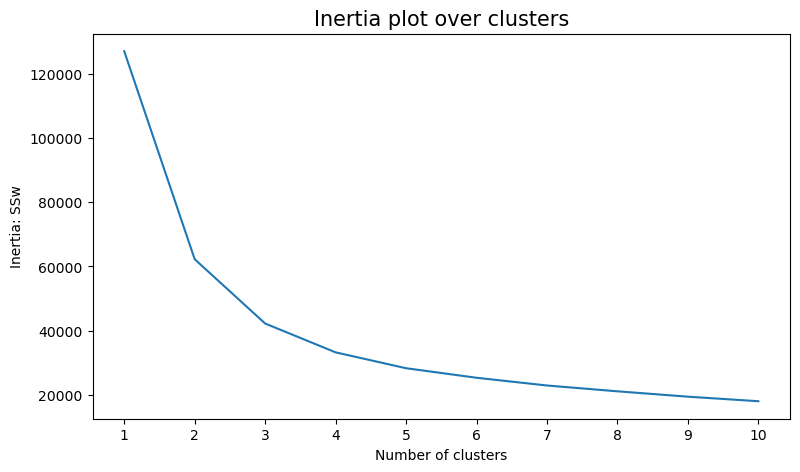

In [36]:
# The inertia plot for time of order features

fig, ax = plt.subplots(figsize=(9,5))

ax.plot(range_clusters, inertia)
ax.set_xticks(range_clusters)
ax.set_ylabel("Inertia: SSw")
ax.set_xlabel("Number of clusters")
ax.set_title("Inertia plot over clusters", size=15)

plt.show()

For n_clusters = 2, the average silhouette_score is : 0.7100152723208497
For n_clusters = 3, the average silhouette_score is : 0.6039367613110275
For n_clusters = 4, the average silhouette_score is : 0.5298965865542966
For n_clusters = 5, the average silhouette_score is : 0.4592561725566
For n_clusters = 6, the average silhouette_score is : 0.4017276373413492
For n_clusters = 7, the average silhouette_score is : 0.39821268037721347
For n_clusters = 8, the average silhouette_score is : 0.39539774984750264
For n_clusters = 9, the average silhouette_score is : 0.3915622393451658
For n_clusters = 10, the average silhouette_score is : 0.392045873936958


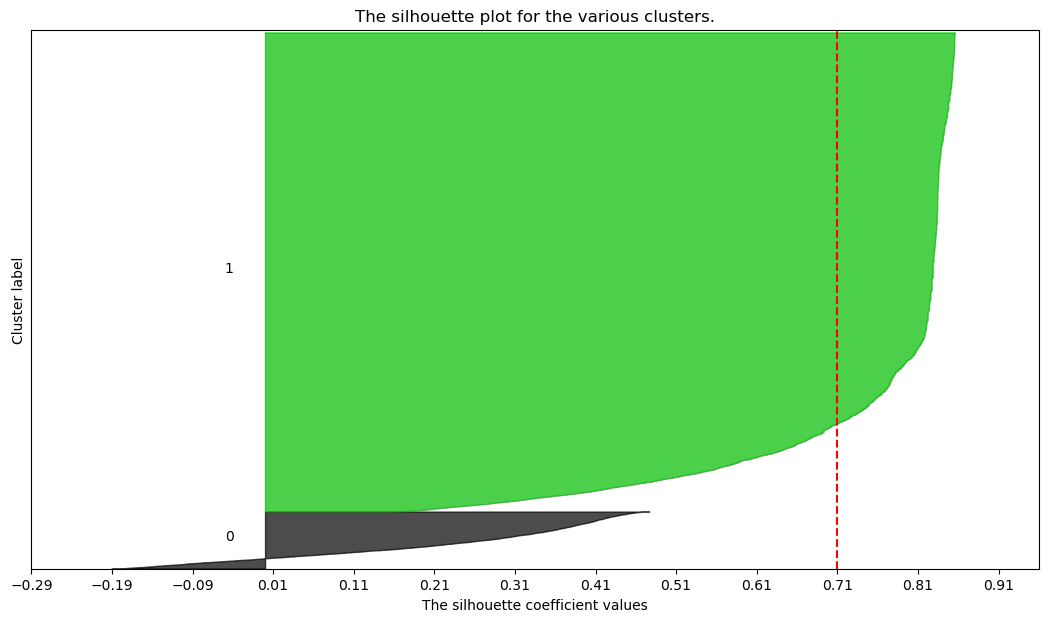

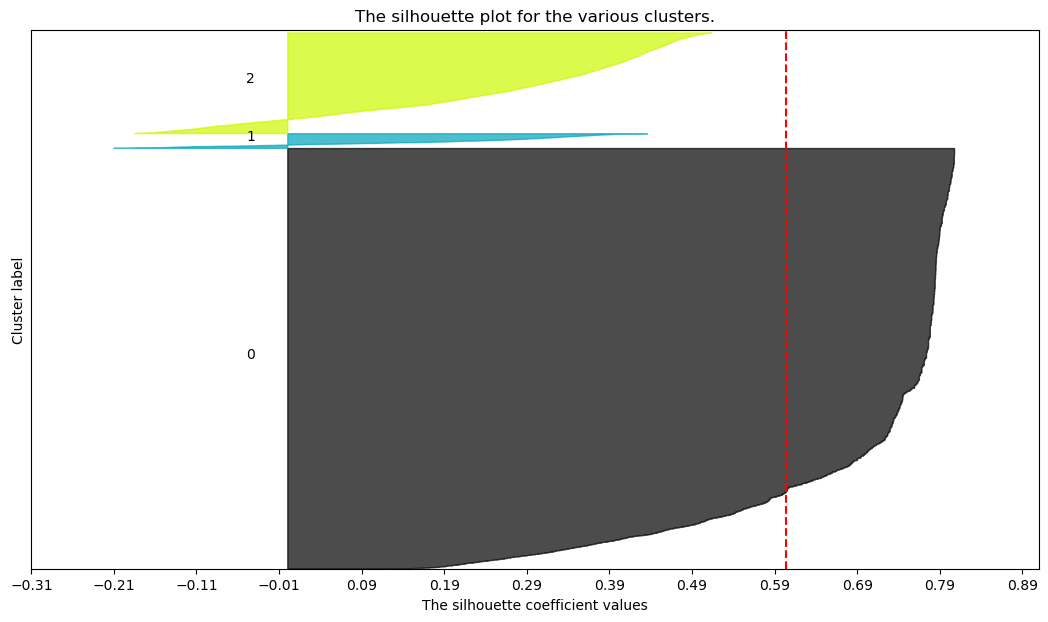

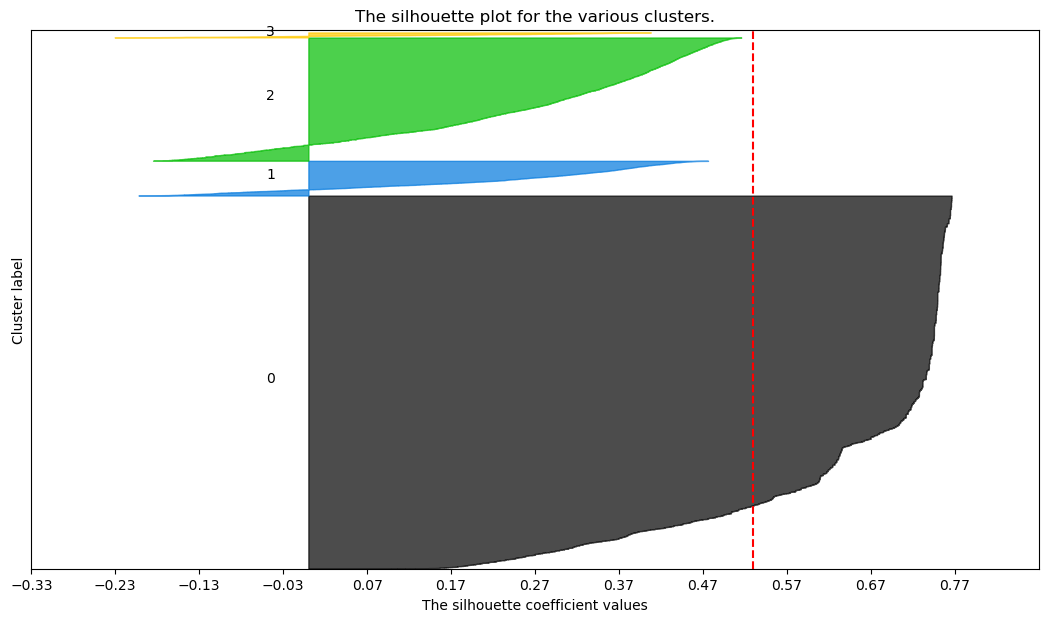

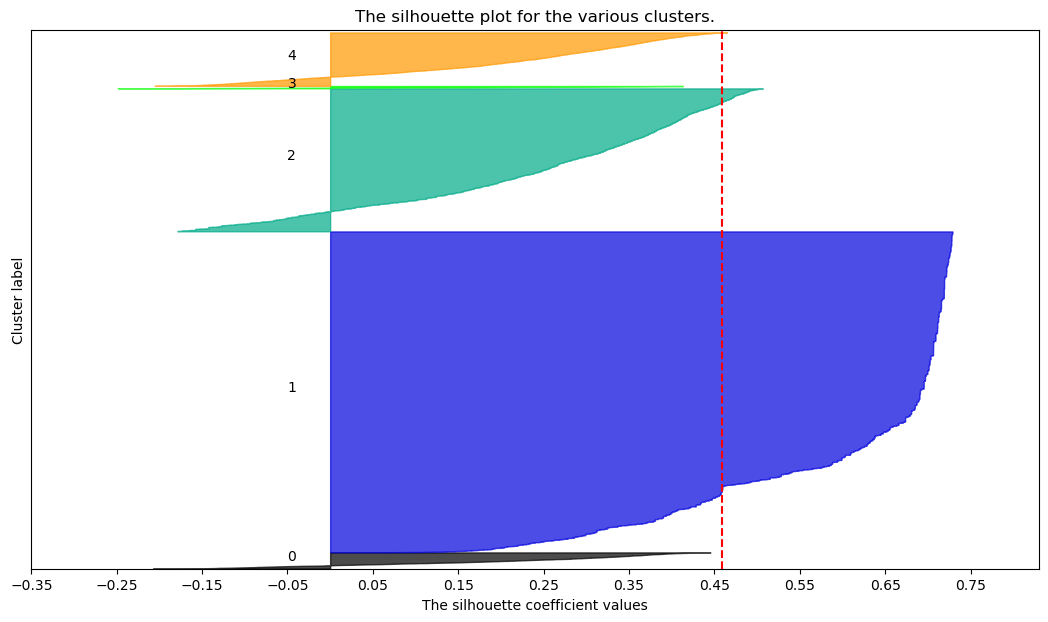

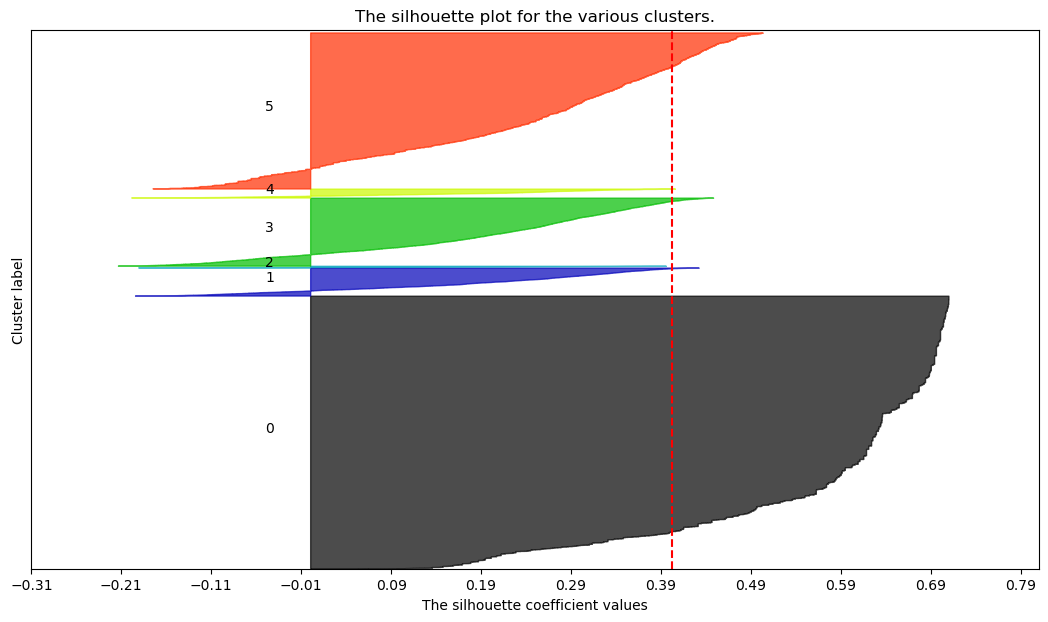

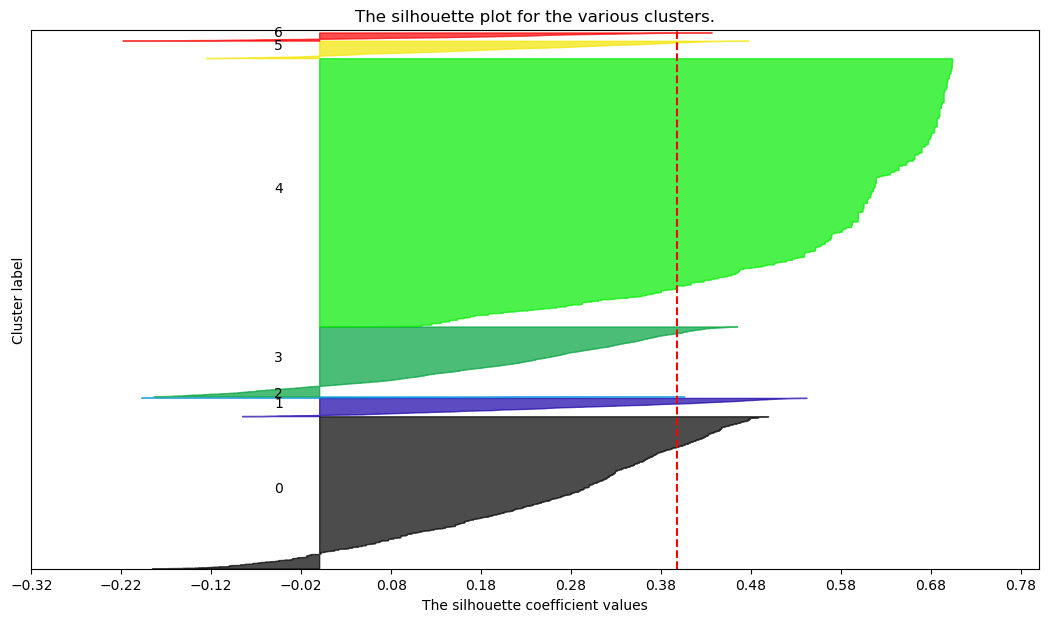

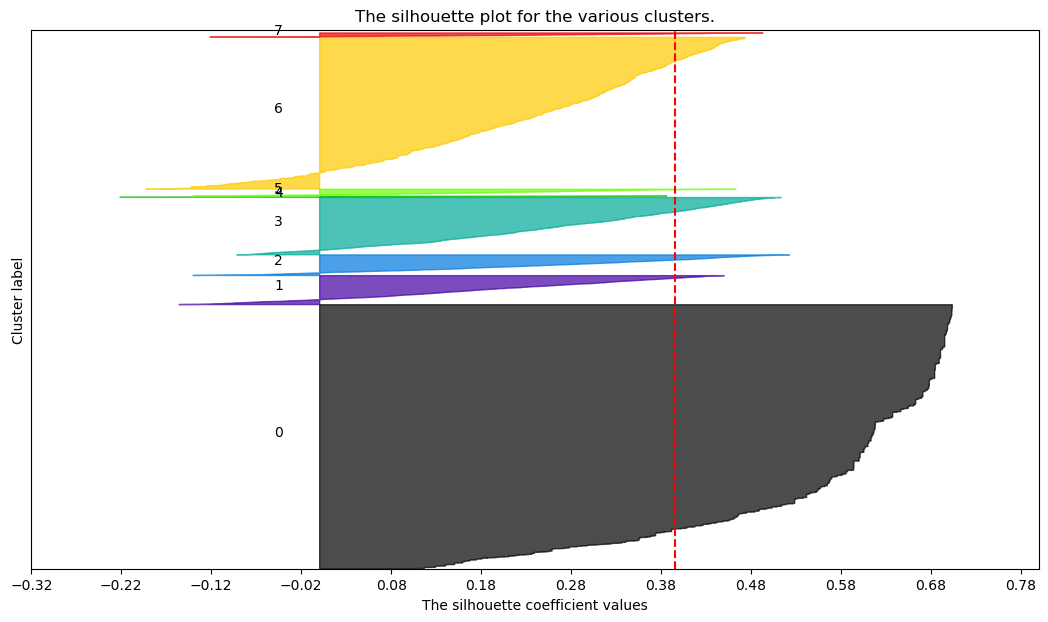

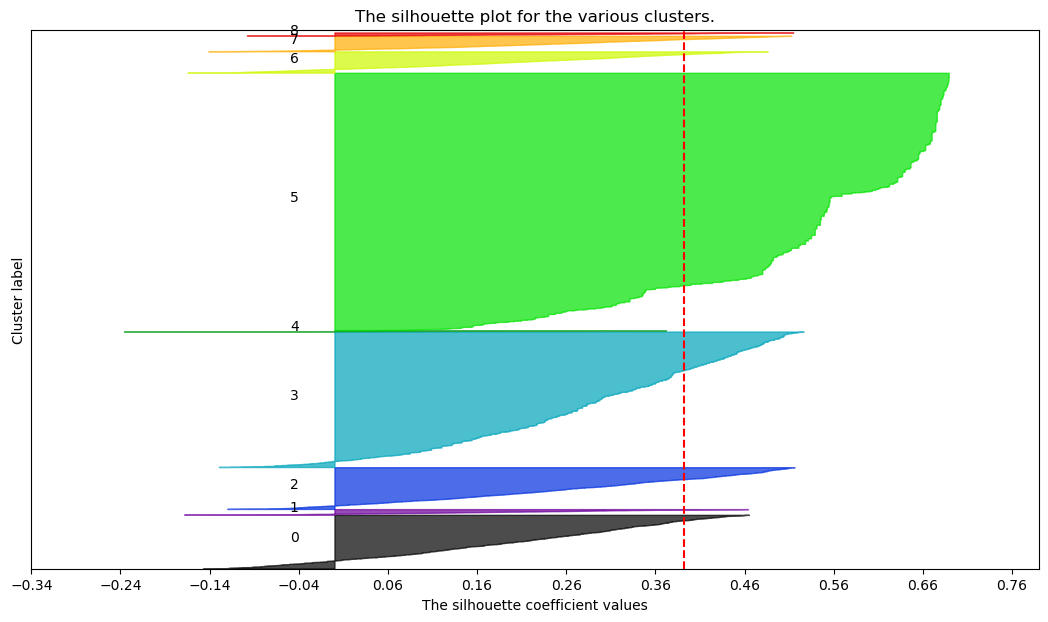

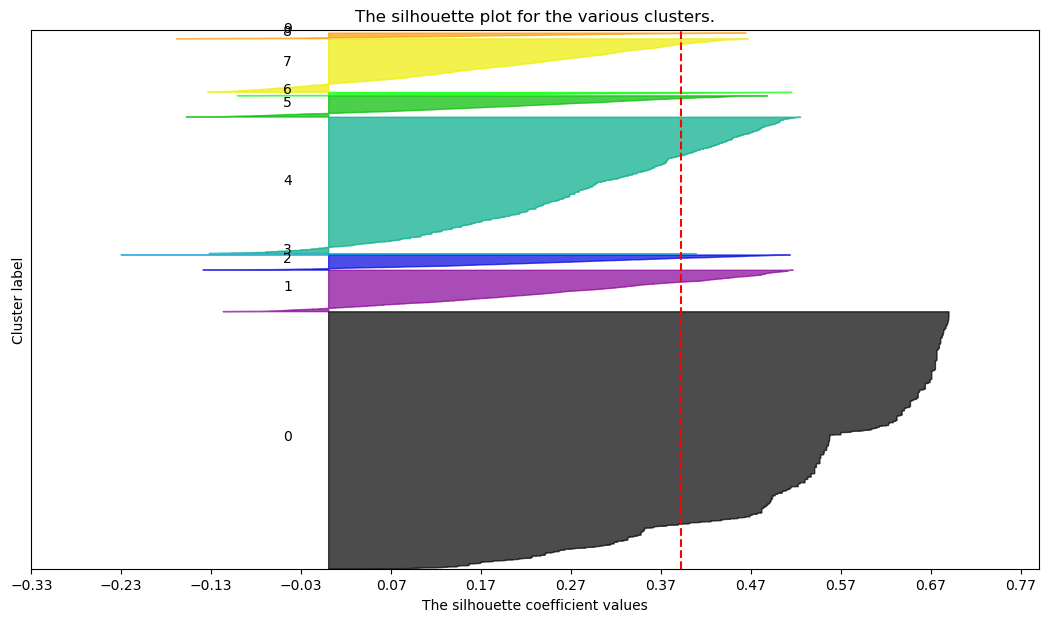

In [37]:
# Adapted from:
# https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html#sphx-glr-auto-examples-cluster-plot-kmeans-silhouette-analysis-py

# Storing average silhouette metric for time of order features
avg_silhouette = []
for nclus in range_clusters:
    # Skip nclus == 1
    if nclus == 1:
        continue
    
    # Create a figure
    fig = plt.figure(figsize=(13, 7))

    # Initialize the KMeans object with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    kmclust = KMeans(n_clusters=nclus, init='k-means++', n_init=15, random_state=1)
    cluster_labels = kmclust.fit_predict(order_volume_features)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed clusters
    silhouette_avg = silhouette_score(order_volume_features, cluster_labels)
    avg_silhouette.append(silhouette_avg)
    print(f"For n_clusters = {nclus}, the average silhouette_score is : {silhouette_avg}")

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(order_volume_features, cluster_labels)

    y_lower = 10
    for i in range(nclus):
        # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        
        # Get y_upper to demarcate silhouette y range size
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        
        # Filling the silhouette
        color = cm.nipy_spectral(float(i) / nclus)
        plt.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    plt.title("The silhouette plot for the various clusters.")
    plt.xlabel("The silhouette coefficient values")
    plt.ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    plt.axvline(x=silhouette_avg, color="red", linestyle="--")
    
    # The silhouette coefficient can range from -1, 1
    xmin, xmax = np.round(sample_silhouette_values.min() -0.1, 2), np.round(sample_silhouette_values.max() + 0.1, 2)
    plt.xlim([xmin, xmax])
    
    # The (nclus+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    plt.ylim([0, len(df_scaled_original) + (nclus + 1) * 10])

    plt.yticks([])  # Clear the yaxis labels / ticks
    plt.xticks(np.arange(xmin, xmax, 0.1))

In [38]:
#K-means with K=2 for order volume columns
kmclust = KMeans(n_clusters=2, init='k-means++', n_init=15, random_state=1)
kmclust.fit(order_volume_features)
km_labels = kmclust.fit_predict(order_volume_features)

# Characterizing the final clusters
df_concat = pd.concat((order_volume_features, pd.Series(km_labels, name='labels', index=order_volume_features.index)), axis=1)
df_concat.groupby('labels').mean()

,vendor_count,product_count,total_spending,total_orders
labels,,,,
0,2.076465,2.148619,1.916128,2.132442
1,-0.246848,-0.255425,-0.227787,-0.253502


# Analysis: Low spenders/ high spenders

In [39]:
#K-means with K=3 for order volume columns
kmclust = KMeans(n_clusters=3, init='k-means++', n_init=15, random_state=1)
kmclust.fit(order_volume_features)
km_labels = kmclust.fit_predict(order_volume_features)

# Characterizing the final clusters
df_concat = pd.concat((order_volume_features, pd.Series(km_labels, name='labels', index=order_volume_features.index)), axis=1)
df_concat.groupby('labels').mean()

,vendor_count,product_count,total_spending,total_orders
labels,,,,
0,-0.375464,-0.362532,-0.329591,-0.361000
1,3.466069,4.147316,3.546764,4.102171
2,1.064650,0.911362,0.861136,0.911533


# Analysis: low spenders, high spenders, medium spenders

In [15]:
#K-means with K=4 for order volume columns
kmclust = KMeans(n_clusters=4, init='k-means++', n_init=15, random_state=1)
kmclust.fit(order_volume_features)
km_labels = kmclust.fit_predict(order_volume_features)

# Characterizing the final clusters
df_concat_order_volume = pd.concat((order_volume_features, pd.Series(km_labels, name='labels', index=order_volume_features.index)), axis=1)
df_concat_order_volume.groupby('labels').mean()

,vendor_count,product_count,total_spending,total_orders
labels,,,,
0,-0.451917,-0.423076,-0.388238,-0.422607
1,2.155312,2.128936,1.895123,2.122458
2,0.578865,0.436302,0.434627,0.441589
3,4.602555,6.173307,5.218620,6.050799


# Analysis: low spenders, high spenders, medium spenders, very very high spenders

# Cluster Analysis:



# Day of Week Orders

In [49]:
df_scaled_original.columns

Index(['vendor_count ', 'product_count ', 'is_chain ', 'last_order ',
       'CUI_American ', 'CUI_Asian ', 'CUI_Beverages ', 'CUI_Cafe ',
       'CUI_Chicken Dishes ', 'CUI_Chinese ', 'CUI_Desserts ', 'CUI_Healthy ',
       'CUI_Indian ', 'CUI_Italian ', 'CUI_Japanese ', 'CUI_Noodle Dishes ',
       'CUI_OTHER ', 'CUI_Street Food / Snacks ', 'CUI_Thai ', 'DOW_0 ',
       'DOW_1 ', 'DOW_2 ', 'DOW_3 ', 'DOW_4 ', 'DOW_5 ', 'DOW_6 ', 'HR_1 ',
       'HR_2 ', 'HR_3 ', 'HR_4 ', 'HR_5 ', 'HR_6 ', 'HR_7 ', 'HR_8 ', 'HR_9 ',
       'HR_10 ', 'HR_11 ', 'HR_12 ', 'HR_13 ', 'HR_14 ', 'HR_15 ', 'HR_16 ',
       'HR_17 ', 'HR_18 ', 'HR_19 ', 'HR_20 ', 'HR_21 ', 'HR_22 ', 'HR_23'],
      dtype='object')

In [50]:

days_of_week_features = df_scaled_original[['DOW_0 ', 'DOW_1 ', 'DOW_2 ', 'DOW_3 ', 'DOW_4 ', 'DOW_5 ', 'DOW_6 ']]

In [51]:
#K-means with order_volume features finding the best number of clusters
range_clusters = range(1, 11)

inertia = []
for n_clus in range_clusters:  # iterate over desired ncluster range
    kmclust = KMeans(n_clusters=n_clus, init='k-means++', n_init=15, random_state=42)
    kmclust.fit(days_of_week_features)
    inertia.append(kmclust.inertia_)  

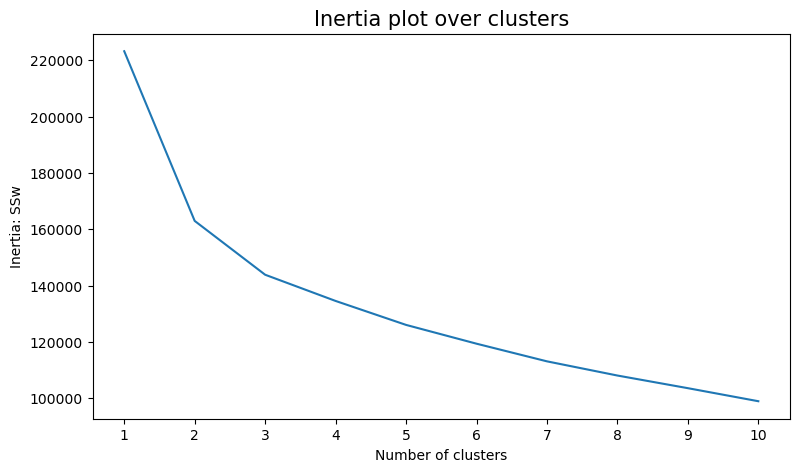

In [52]:
# The inertia plot for time of order features

fig, ax = plt.subplots(figsize=(9,5))

ax.plot(range_clusters, inertia)
ax.set_xticks(range_clusters)
ax.set_ylabel("Inertia: SSw")
ax.set_xlabel("Number of clusters")
ax.set_title("Inertia plot over clusters", size=15)

plt.show()

In [ ]:
# Adapted from:
# https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html#sphx-glr-auto-examples-cluster-plot-kmeans-silhouette-analysis-py

# Storing average silhouette metric for time of order features
avg_silhouette = []
for nclus in range_clusters:
    # Skip nclus == 1
    if nclus == 1:
        continue
    
    # Create a figure
    fig = plt.figure(figsize=(13, 7))

    # Initialize the KMeans object with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    kmclust = KMeans(n_clusters=nclus, init='k-means++', n_init=15, random_state=1)
    cluster_labels = kmclust.fit_predict(days_of_week_features)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed clusters
    silhouette_avg = silhouette_score(days_of_week_features, cluster_labels)
    avg_silhouette.append(silhouette_avg)
    print(f"For n_clusters = {nclus}, the average silhouette_score is : {silhouette_avg}")

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(days_of_week_features, cluster_labels)

    y_lower = 10
    for i in range(nclus):
        # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        
        # Get y_upper to demarcate silhouette y range size
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        
        # Filling the silhouette
        color = cm.nipy_spectral(float(i) / nclus)
        plt.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    plt.title("The silhouette plot for the various clusters.")
    plt.xlabel("The silhouette coefficient values")
    plt.ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    plt.axvline(x=silhouette_avg, color="red", linestyle="--")
    
    # The silhouette coefficient can range from -1, 1
    xmin, xmax = np.round(sample_silhouette_values.min() -0.1, 2), np.round(sample_silhouette_values.max() + 0.1, 2)
    plt.xlim([xmin, xmax])
    
    # The (nclus+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    plt.ylim([0, len(df_scaled_original) + (nclus + 1) * 10])

    plt.yticks([])  # Clear the yaxis labels / ticks
    plt.xticks(np.arange(xmin, xmax, 0.1))

For n_clusters = 2, the average silhouette_score is : 0.5861695313547801


In [46]:
#K-means with K=2 for days of week columns
kmclust = KMeans(n_clusters=2, init='k-means++', n_init=15, random_state=1)
kmclust.fit(days_of_week_features)
km_labels = kmclust.fit_predict(days_of_week_features)

# Characterizing the final clusters
df_concat = pd.concat((days_of_week_features, pd.Series(km_labels, name='labels', index=days_of_week_features.index)), axis=1)
df_concat.groupby('labels').mean()

,DOW_0,DOW_1,DOW_2,DOW_3,DOW_4,DOW_5,DOW_6
labels,,,,,,,
0,-0.160676,-0.163241,-0.164652,-0.163392,-0.154428,-0.134694,-0.138765
1,1.812227,1.841163,1.857078,1.842868,1.741763,1.519188,1.565096


# Analysis: High spenders/ low spenders (not good for DOW)

In [47]:
#K-means with K=3 for days of week columns
kmclust = KMeans(n_clusters=3, init='k-means++', n_init=15, random_state=1)
kmclust.fit(days_of_week_features)
km_labels = kmclust.fit_predict(days_of_week_features)

# Characterizing the final clusters
df_concat = pd.concat((days_of_week_features, pd.Series(km_labels, name='labels', index=days_of_week_features.index)), axis=1)
df_concat.groupby('labels').mean()

,DOW_0,DOW_1,DOW_2,DOW_3,DOW_4,DOW_5,DOW_6
labels,,,,,,,
0,-0.229371,-0.236676,-0.238207,-0.242195,-0.232911,-0.213677,-0.218832
1,3.359179,3.303737,3.295623,3.243018,3.077736,2.754673,2.808674
2,0.735634,0.782561,0.791890,0.820744,0.795210,0.739510,0.759154


# Analysis: High spenders/ low spenders /medium spenders (not good for DOW)

In [48]:
#K-means with K=4 for days of week columns
kmclust = KMeans(n_clusters=4, init='k-means++', n_init=15, random_state=1)
kmclust.fit(days_of_week_features)
km_labels = kmclust.fit_predict(days_of_week_features)

# Characterizing the final clusters
df_concat = pd.concat((days_of_week_features, pd.Series(km_labels, name='labels', index=days_of_week_features.index)), axis=1)
df_concat.groupby('labels').mean()

,DOW_0,DOW_1,DOW_2,DOW_3,DOW_4,DOW_5,DOW_6
labels,,,,,,,
0,5.241424,5.131245,4.965175,4.793163,4.740289,4.321799,4.278882
1,-0.293047,-0.290940,-0.300237,-0.302111,-0.292900,-0.276047,-0.281215
2,1.702261,1.757165,1.810202,1.810430,1.670901,1.359513,1.413719
3,0.327719,0.310856,0.331152,0.341862,0.349593,0.386978,0.390705


# Analysis: High spenders/ low spenders /medium spenders/ very high spenders (not good for DOW)

# Weekend vs Weekday Orders

In [11]:
weekday_weekend_features = df_scaled_new[['weekend_orders', 'underweekend_orders']]

In [12]:
#K-means with weekday/weekend features finding the best number of clusters
range_clusters = range(1, 11)

inertia = []
for n_clus in range_clusters:  # iterate over desired ncluster range
    kmclust = KMeans(n_clusters=n_clus, init='k-means++', n_init=15, random_state=42)
    kmclust.fit(weekday_weekend_features)
    inertia.append(kmclust.inertia_)  

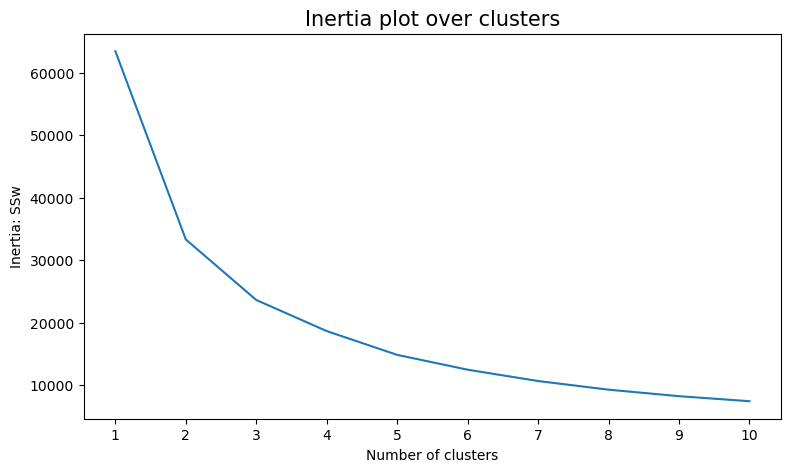

In [13]:
# The inertia plot for time of order features

fig, ax = plt.subplots(figsize=(9,5))

ax.plot(range_clusters, inertia)
ax.set_xticks(range_clusters)
ax.set_ylabel("Inertia: SSw")
ax.set_xlabel("Number of clusters")
ax.set_title("Inertia plot over clusters", size=15)

plt.show()

For n_clusters = 2, the average silhouette_score is : 0.7106220078220753
For n_clusters = 3, the average silhouette_score is : 0.5551103801421507
For n_clusters = 4, the average silhouette_score is : 0.47367077265123786
For n_clusters = 5, the average silhouette_score is : 0.498032959952242
For n_clusters = 6, the average silhouette_score is : 0.4599395188238015
For n_clusters = 7, the average silhouette_score is : 0.4776240733469392
For n_clusters = 8, the average silhouette_score is : 0.4813773936856455
For n_clusters = 9, the average silhouette_score is : 0.4873923466121565
For n_clusters = 10, the average silhouette_score is : 0.5049953619409357


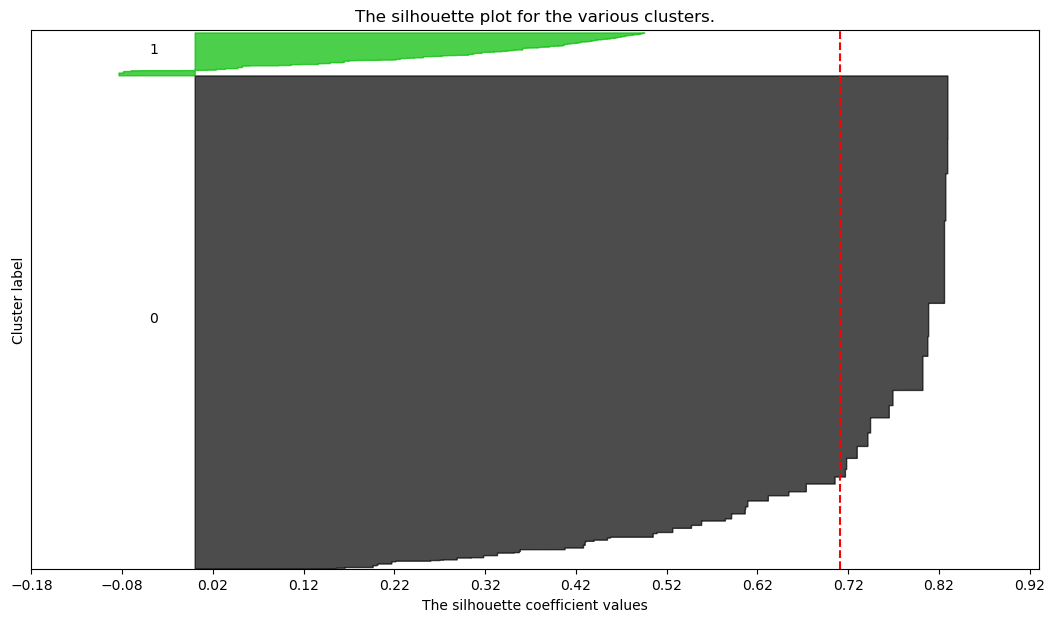

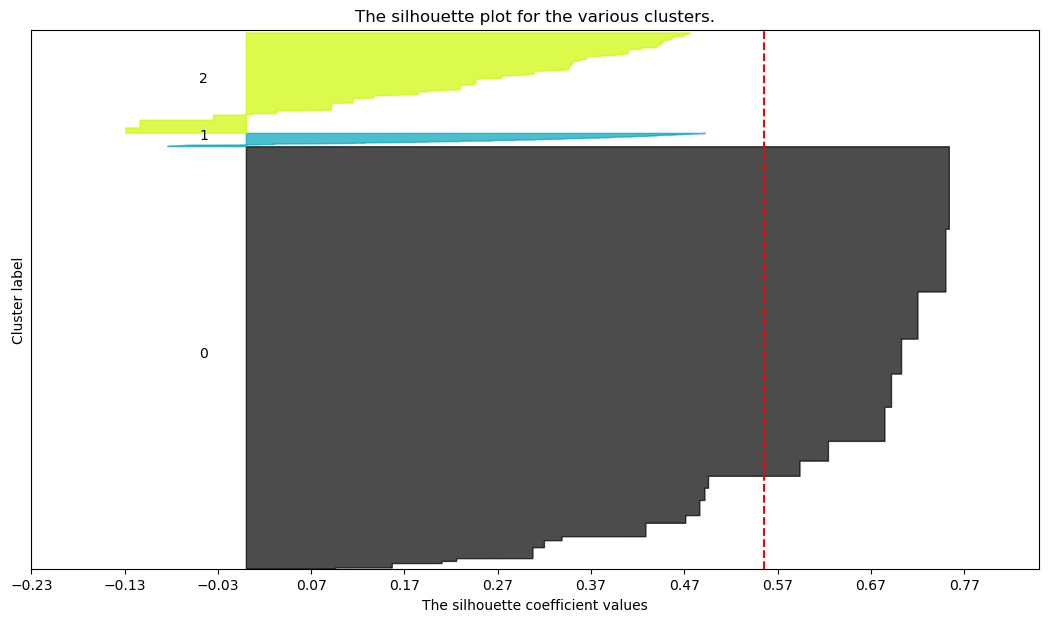

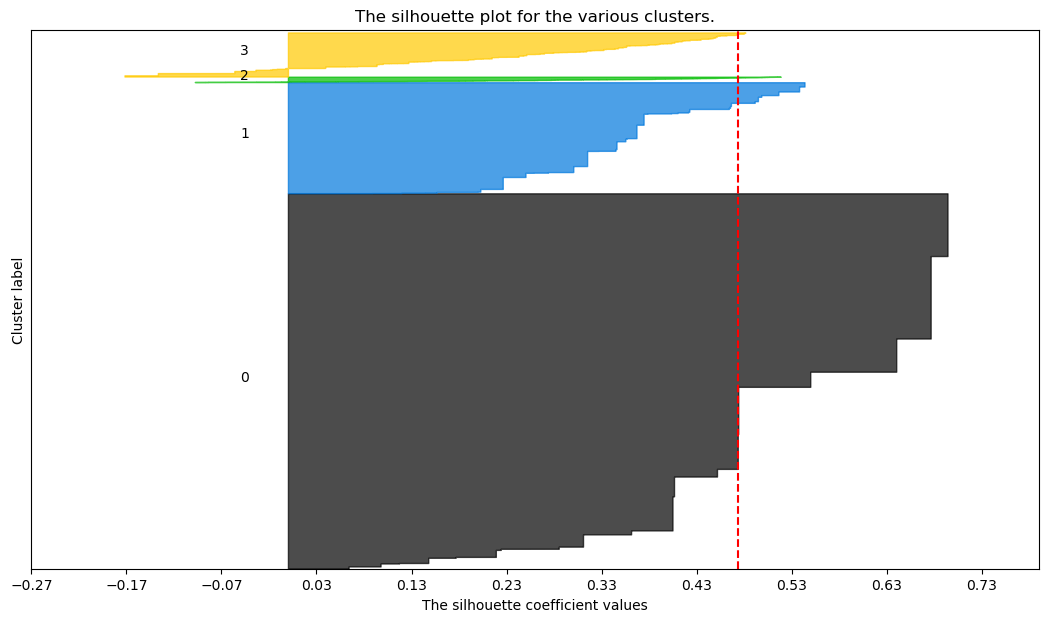

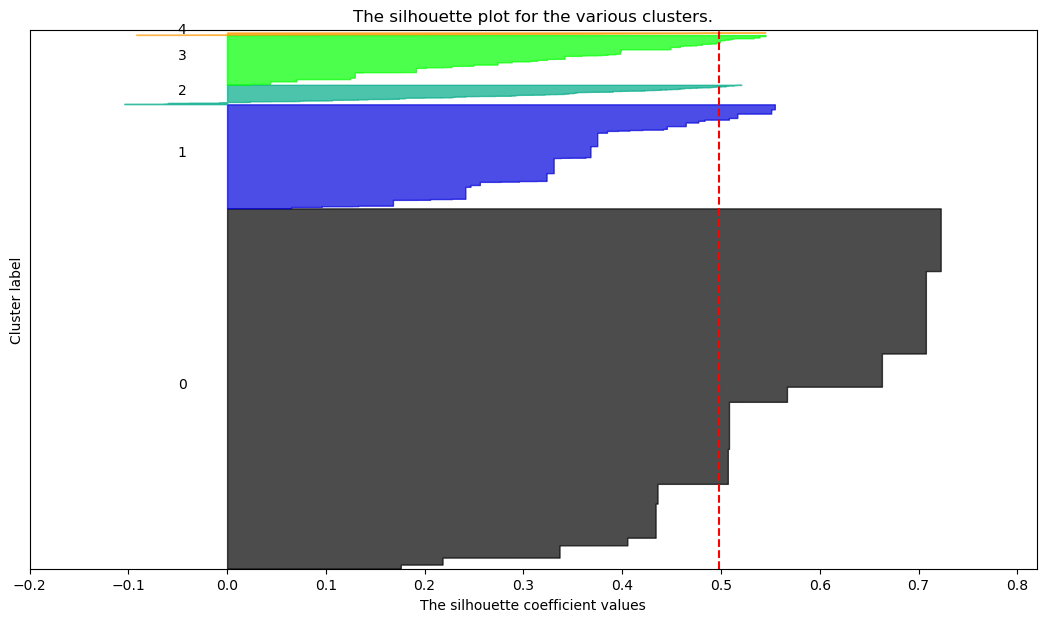

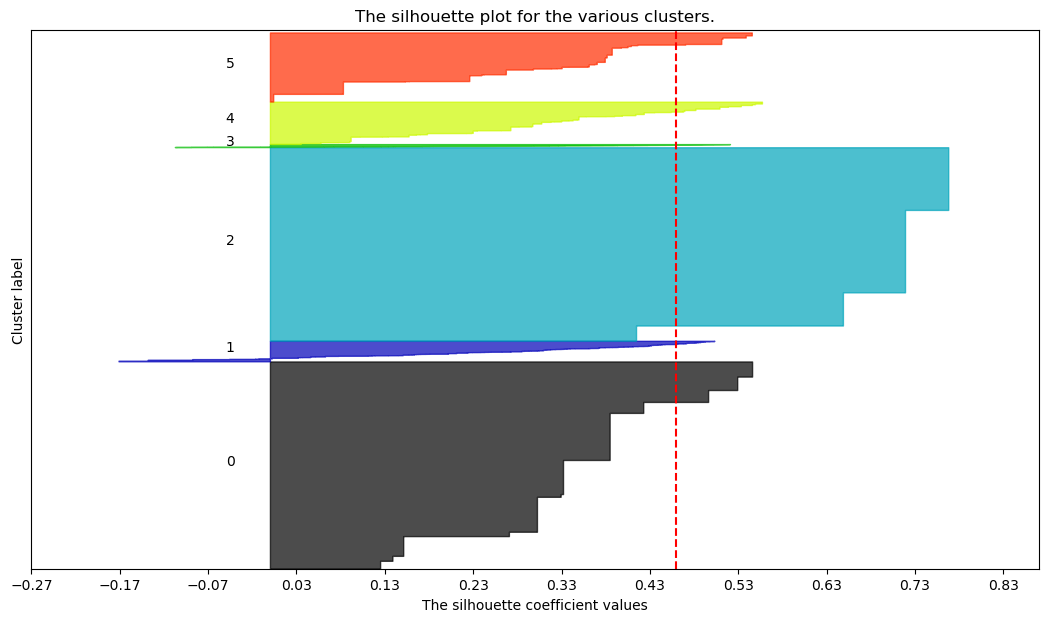

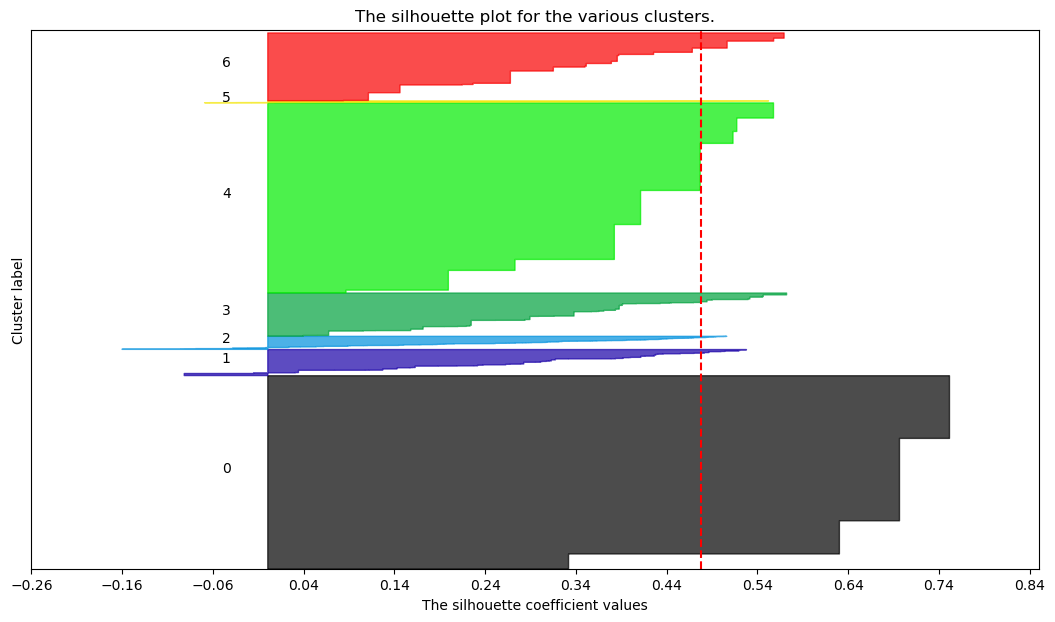

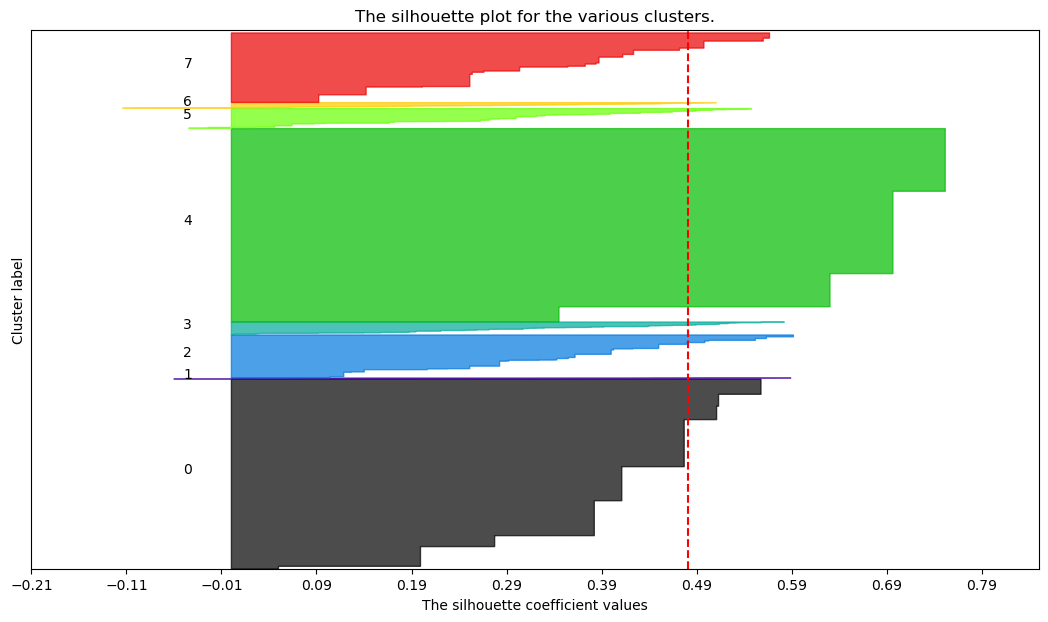

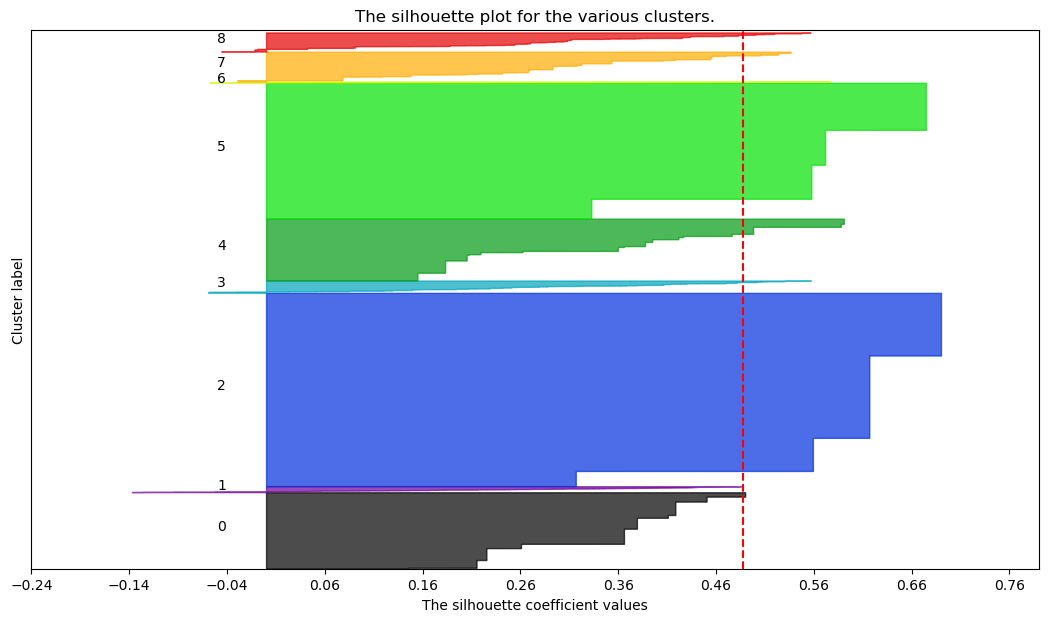

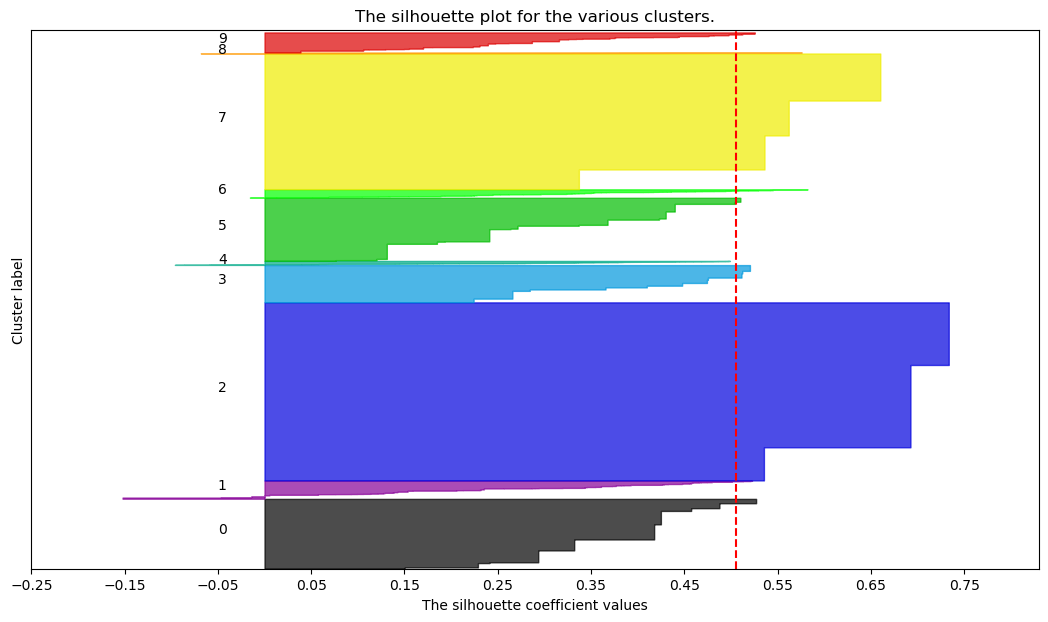

In [14]:
# Adapted from:
# https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html#sphx-glr-auto-examples-cluster-plot-kmeans-silhouette-analysis-py

# Storing average silhouette metric for time of order features
avg_silhouette = []
for nclus in range_clusters:
    # Skip nclus == 1
    if nclus == 1:
        continue
    
    # Create a figure
    fig = plt.figure(figsize=(13, 7))

    # Initialize the KMeans object with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    kmclust = KMeans(n_clusters=nclus, init='k-means++', n_init=15, random_state=1)
    cluster_labels = kmclust.fit_predict(weekday_weekend_features)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed clusters
    silhouette_avg = silhouette_score(weekday_weekend_features, cluster_labels)
    avg_silhouette.append(silhouette_avg)
    print(f"For n_clusters = {nclus}, the average silhouette_score is : {silhouette_avg}")

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(weekday_weekend_features, cluster_labels)

    y_lower = 10
    for i in range(nclus):
        # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        
        # Get y_upper to demarcate silhouette y range size
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        
        # Filling the silhouette
        color = cm.nipy_spectral(float(i) / nclus)
        plt.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    plt.title("The silhouette plot for the various clusters.")
    plt.xlabel("The silhouette coefficient values")
    plt.ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    plt.axvline(x=silhouette_avg, color="red", linestyle="--")
    
    # The silhouette coefficient can range from -1, 1
    xmin, xmax = np.round(sample_silhouette_values.min() -0.1, 2), np.round(sample_silhouette_values.max() + 0.1, 2)
    plt.xlim([xmin, xmax])
    
    # The (nclus+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    plt.ylim([0, len(df_scaled_original) + (nclus + 1) * 10])

    plt.yticks([])  # Clear the yaxis labels / ticks
    plt.xticks(np.arange(xmin, xmax, 0.1))

In [15]:
#K-means with K=2 for weekday_weekend columns
kmclust = KMeans(n_clusters=2, init='k-means++', n_init=15, random_state=1)
kmclust.fit(weekday_weekend_features)
km_labels = kmclust.fit_predict(weekday_weekend_features)

# Characterizing the final clusters
df_concat = pd.concat((weekday_weekend_features, pd.Series(km_labels, name='labels', index=weekday_weekend_features.index)), axis=1)
df_concat.groupby('labels').mean()

,weekend_orders,underweekend_orders
labels,,
0,-0.199228,-0.207090
1,2.292068,2.382517


# Age with spending

In [13]:
age_order_volume = df_scaled_new[['customer_age', 'total_spending', 'total_orders']]

In [14]:
#K-means with order_volume features finding the best number of clusters
range_clusters = range(1, 11)

inertia = []
for n_clus in range_clusters:  # iterate over desired ncluster range
    kmclust = KMeans(n_clusters=n_clus, init='k-means++', n_init=15, random_state=42)
    kmclust.fit(age_order_volume)
    inertia.append(kmclust.inertia_)

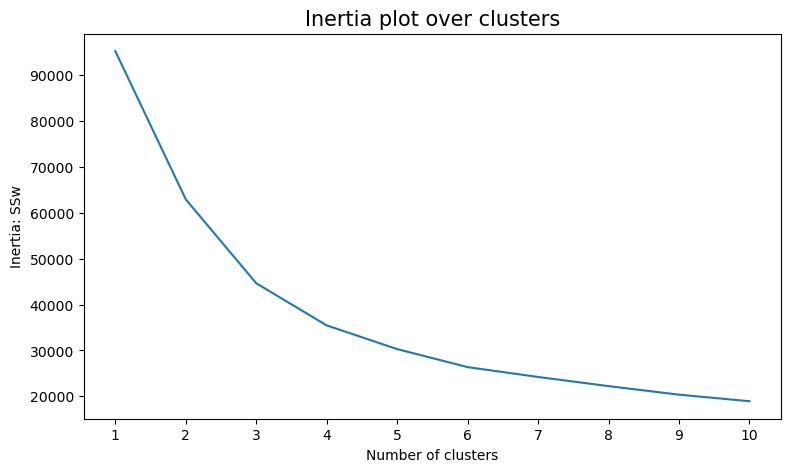

In [15]:
fig, ax = plt.subplots(figsize=(9,5))

ax.plot(range_clusters, inertia)
ax.set_xticks(range_clusters)
ax.set_ylabel("Inertia: SSw")
ax.set_xlabel("Number of clusters")
ax.set_title("Inertia plot over clusters", size=15)

plt.show()

In [16]:
#K-means with K=2 for weekday_weekend columns
kmclust = KMeans(n_clusters=2, init='k-means++', n_init=15, random_state=1)
kmclust.fit(age_order_volume)
km_labels = kmclust.fit_predict(age_order_volume)

# Characterizing the final clusters
df_concat = pd.concat((age_order_volume, pd.Series(km_labels, name='labels', index=age_order_volume.index)), axis=1)
df_concat.groupby('labels').mean()

,customer_age,total_spending,total_orders
labels,,,
0,-0.002738,-0.230014,-0.231103
1,0.026208,2.201682,2.212104


# Ratio of Spending to Orders

In [12]:
df_scaled_new['spending_orders'] = df_scaled_new['total_spending'] / df_scaled_new['total_orders']

In [13]:
ratio_spending_orders = df_scaled_new[['total_orders', 'total_spending', 'spending_orders']]

In [35]:
df_scaled_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31737 entries, 0 to 31736
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_age              31737 non-null  float64
 1   vendor_count              31737 non-null  float64
 2   product_count             31737 non-null  float64
 3   is_chain                  31737 non-null  float64
 4   first_order               31737 non-null  float64
 5   last_order                31737 non-null  float64
 6   CUI_American              31737 non-null  float64
 7   CUI_Asian                 31737 non-null  float64
 8   CUI_Beverages             31737 non-null  float64
 9   CUI_Cafe                  31737 non-null  float64
 10  CUI_Chicken Dishes        31737 non-null  float64
 11  CUI_Chinese               31737 non-null  float64
 12  CUI_Desserts              31737 non-null  float64
 13  CUI_Healthy               31737 non-null  float64
 14  CUI_In

In [36]:
#K-means with order_volume features finding the best number of clusters
range_clusters = range(1, 11)

inertia = []
for n_clus in range_clusters:  # iterate over desired ncluster range
    kmclust = KMeans(n_clusters=n_clus, init='k-means++', n_init=15, random_state=42)
    kmclust.fit(ratio_spending_orders)
    inertia.append(kmclust.inertia_)

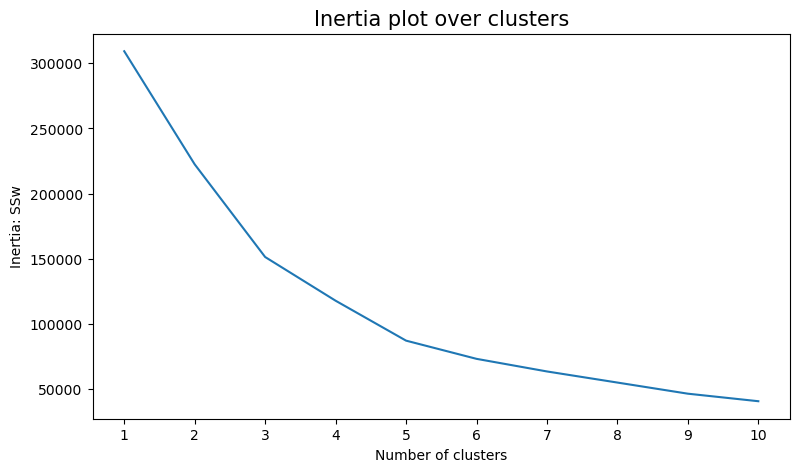

In [37]:
fig, ax = plt.subplots(figsize=(9,5))

ax.plot(range_clusters, inertia)
ax.set_xticks(range_clusters)
ax.set_ylabel("Inertia: SSw")
ax.set_xlabel("Number of clusters")
ax.set_title("Inertia plot over clusters", size=15)

plt.show()

For n_clusters = 2, the average silhouette_score is : 0.6830366711503271
For n_clusters = 3, the average silhouette_score is : 0.662101828662493
For n_clusters = 4, the average silhouette_score is : 0.48185513776113764
For n_clusters = 5, the average silhouette_score is : 0.5932287871314915
For n_clusters = 6, the average silhouette_score is : 0.45629687726150037
For n_clusters = 7, the average silhouette_score is : 0.4684272791455319
For n_clusters = 8, the average silhouette_score is : 0.4639369556127678
For n_clusters = 9, the average silhouette_score is : 0.47153967972695404
For n_clusters = 10, the average silhouette_score is : 0.47977313953315326


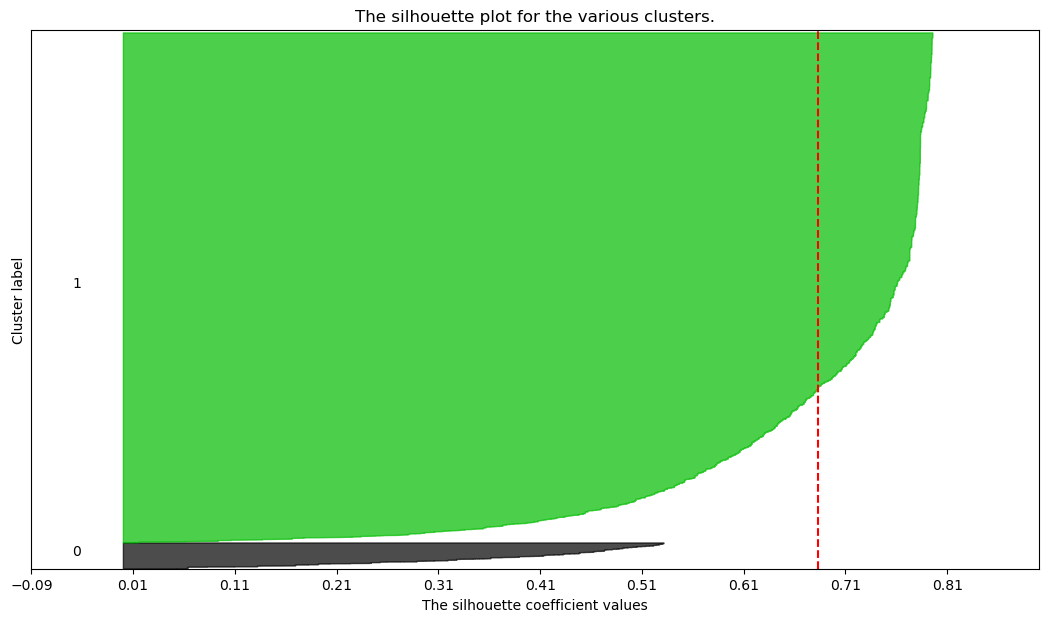

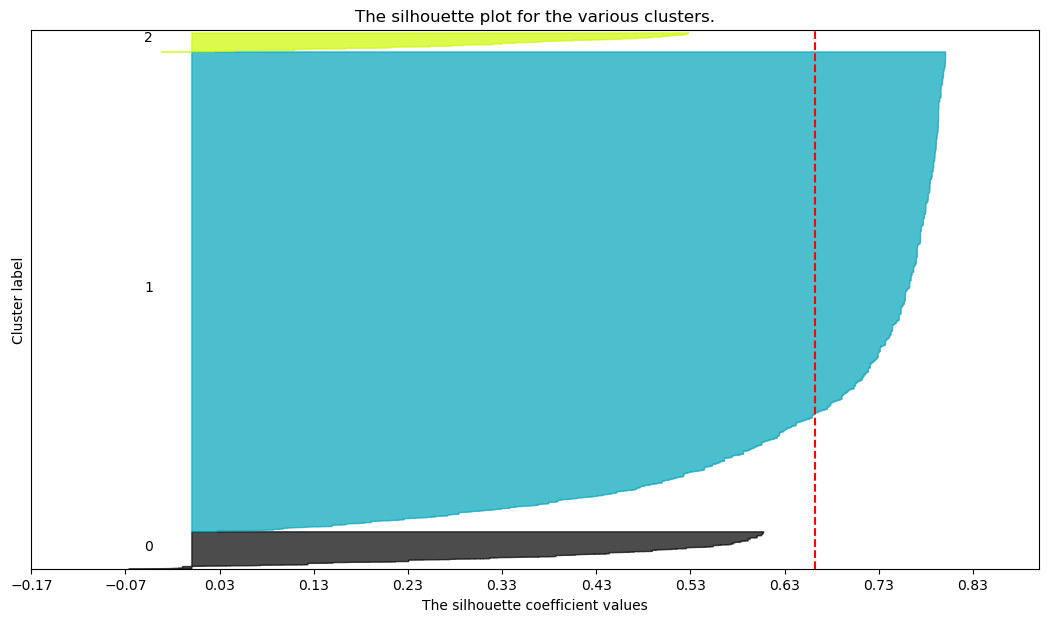

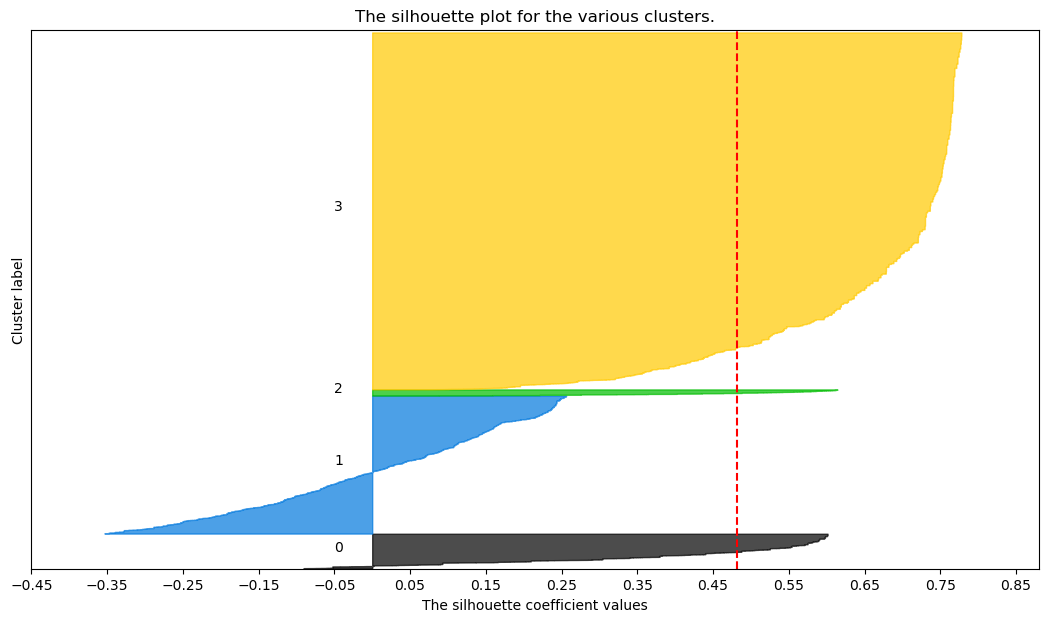

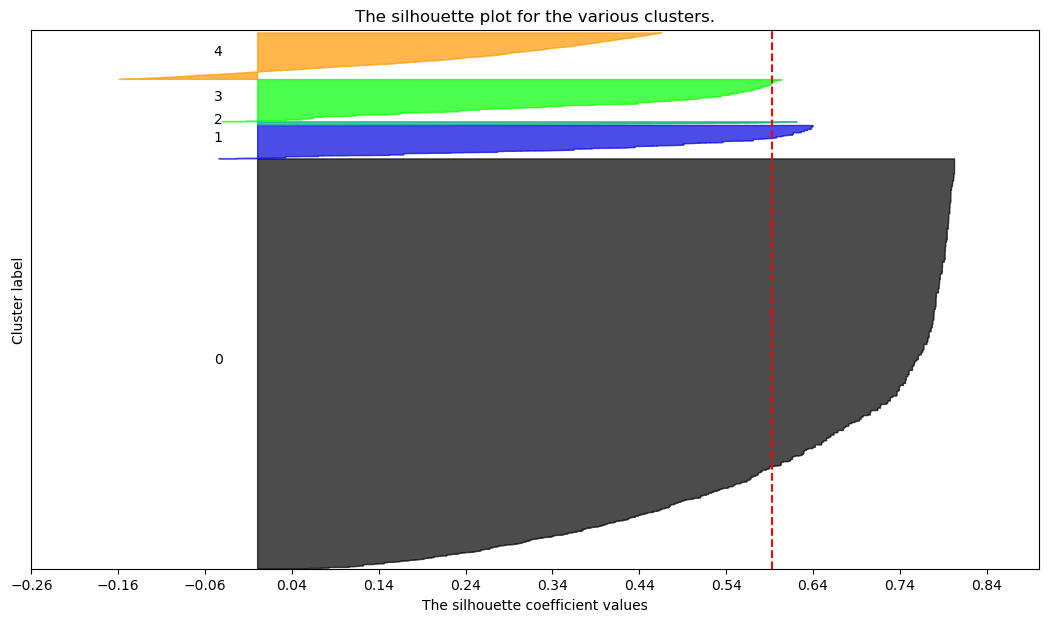

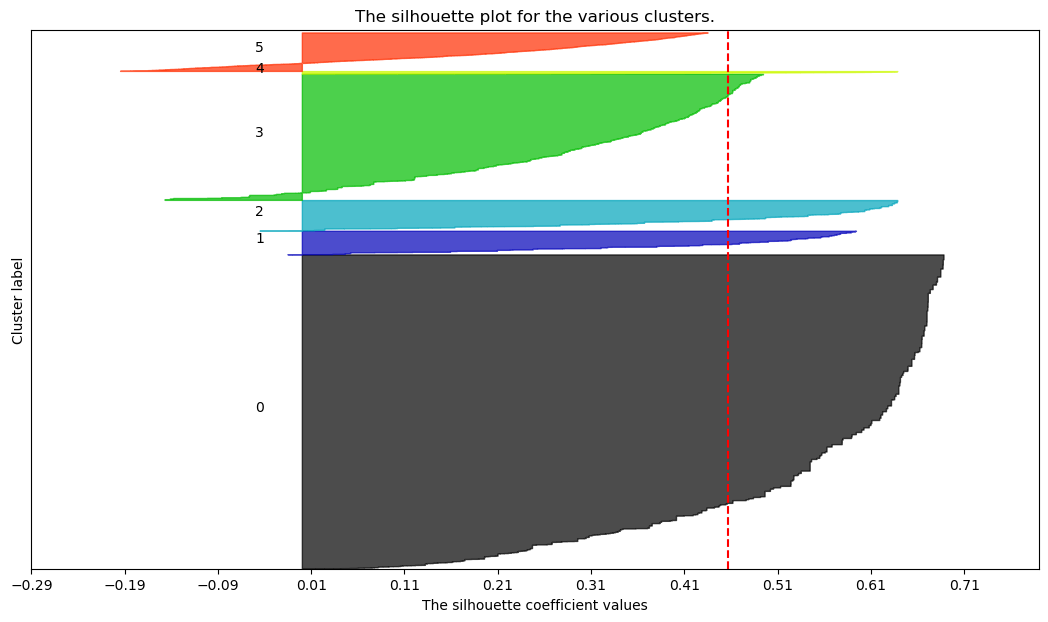

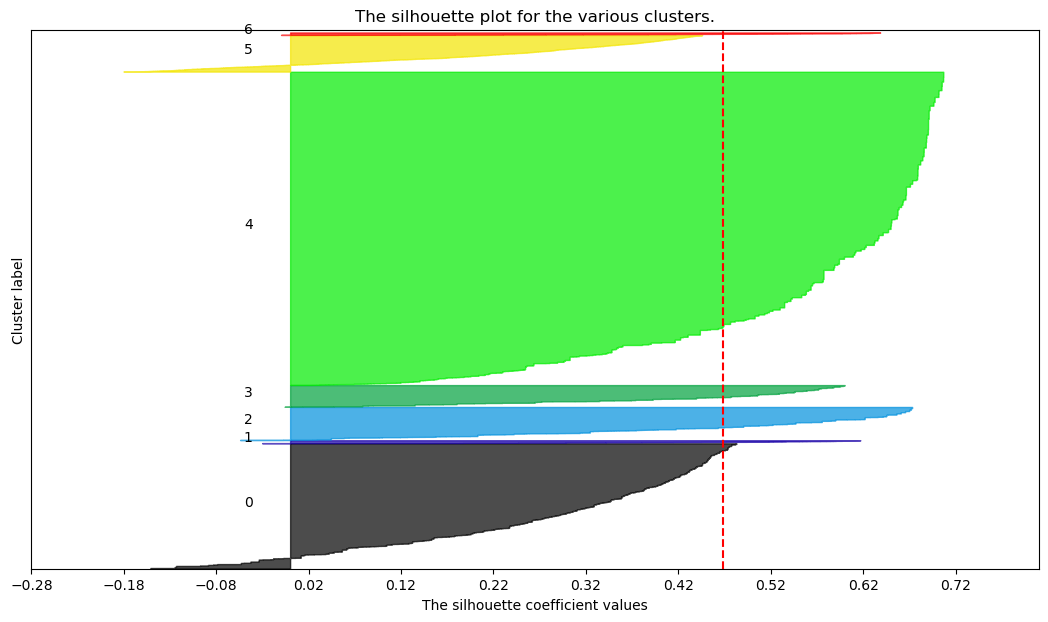

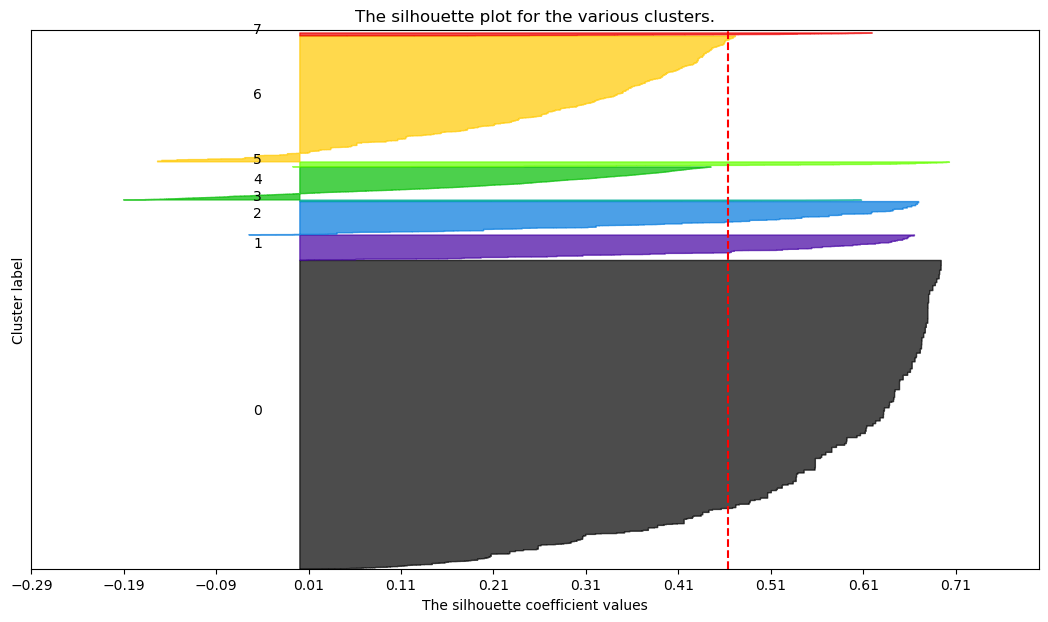

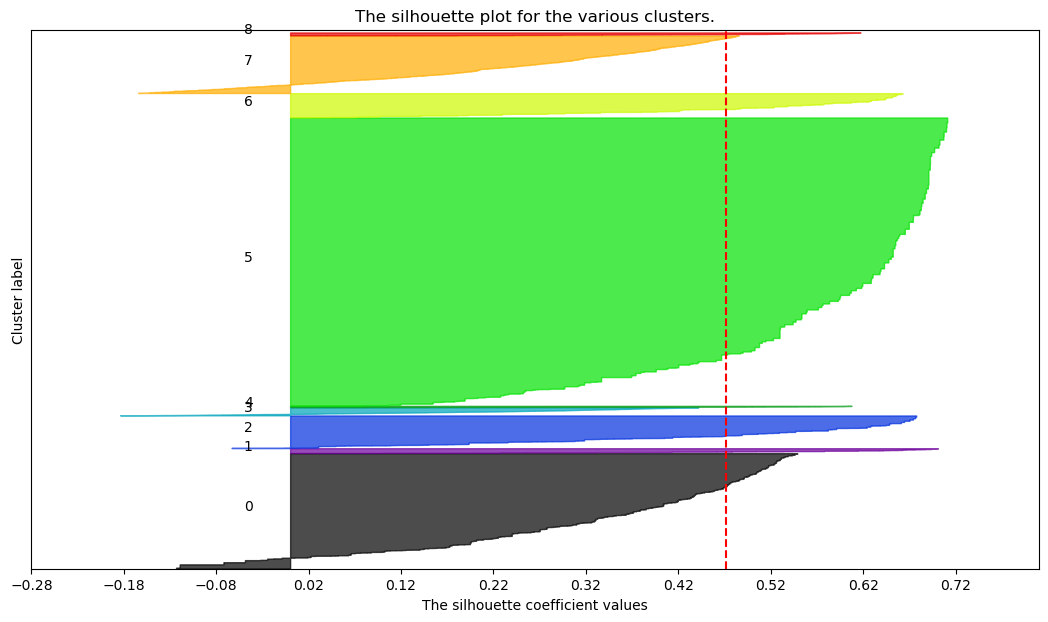

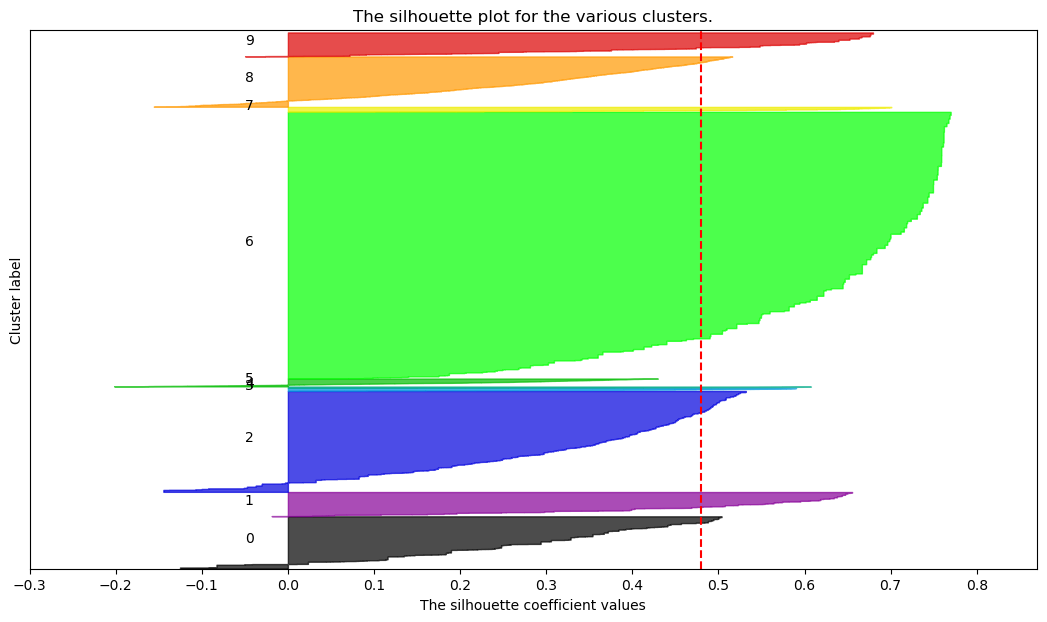

In [43]:
# Adapted from:
# https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html#sphx-glr-auto-examples-cluster-plot-kmeans-silhouette-analysis-py

# Storing average silhouette metric for time of order features
avg_silhouette = []
for nclus in range_clusters:
    # Skip nclus == 1
    if nclus == 1:
        continue
    
    # Create a figure
    fig = plt.figure(figsize=(13, 7))

    # Initialize the KMeans object with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    kmclust = KMeans(n_clusters=nclus, init='k-means++', n_init=15, random_state=1)
    cluster_labels = kmclust.fit_predict(ratio_spending_orders)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed clusters
    silhouette_avg = silhouette_score(ratio_spending_orders, cluster_labels)
    avg_silhouette.append(silhouette_avg)
    print(f"For n_clusters = {nclus}, the average silhouette_score is : {silhouette_avg}")

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(ratio_spending_orders, cluster_labels)

    y_lower = 10
    for i in range(nclus):
        # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        
        # Get y_upper to demarcate silhouette y range size
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        
        # Filling the silhouette
        color = cm.nipy_spectral(float(i) / nclus)
        plt.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    plt.title("The silhouette plot for the various clusters.")
    plt.xlabel("The silhouette coefficient values")
    plt.ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    plt.axvline(x=silhouette_avg, color="red", linestyle="--")
    
    # The silhouette coefficient can range from -1, 1
    xmin, xmax = np.round(sample_silhouette_values.min() -0.1, 2), np.round(sample_silhouette_values.max() + 0.1, 2)
    plt.xlim([xmin, xmax])
    
    # The (nclus+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    plt.ylim([0, len(df_scaled_original) + (nclus + 1) * 10])

    plt.yticks([])  # Clear the yaxis labels / ticks
    plt.xticks(np.arange(xmin, xmax, 0.1))

In [38]:
#K-means with K=2 for weekday_weekend columns
kmclust = KMeans(n_clusters=2, init='k-means++', n_init=15, random_state=1)
kmclust.fit(ratio_spending_orders)
km_labels = kmclust.fit_predict(ratio_spending_orders)

# Characterizing the final clusters
df_concat = pd.concat((ratio_spending_orders, pd.Series(km_labels, name='labels', index=ratio_spending_orders.index)), axis=1)
df_concat.groupby('labels').mean()

,total_orders,total_spending,spending_orders
labels,,,
0,-0.029296,0.319866,-6.482512
1,0.001498,-0.016357,1.195208


In [39]:
#K-means with K=3 for weekday_weekend columns
kmclust = KMeans(n_clusters=3, init='k-means++', n_init=15, random_state=1)
kmclust.fit(ratio_spending_orders)
km_labels = kmclust.fit_predict(ratio_spending_orders)

# Characterizing the final clusters
df_concat = pd.concat((ratio_spending_orders, pd.Series(km_labels, name='labels', index=ratio_spending_orders.index)), axis=1)
df_concat.groupby('labels').mean()

,total_orders,total_spending,spending_orders
labels,,,
0,0.108264,0.489452,6.604391
1,-0.007125,-0.054497,0.710799
2,-0.032729,0.420012,-7.798490


In [40]:
#K-means with K=4 for weekday_weekend columns
kmclust = KMeans(n_clusters=4, init='k-means++', n_init=15, random_state=1)
kmclust.fit(ratio_spending_orders)
km_labels = kmclust.fit_predict(ratio_spending_orders)

# Characterizing the final clusters
df_concat = pd.concat((ratio_spending_orders, pd.Series(km_labels, name='labels', index=ratio_spending_orders.index)), axis=1)
df_concat.groupby('labels').mean()

,total_orders,total_spending,spending_orders
labels,,,
0,0.079814,0.429442,6.808250
1,0.940161,0.615156,-0.753280
2,-0.082787,1.128162,-14.003118
3,-0.369579,-0.298886,1.099542


In [41]:
#K-means with K=5 for weekday_weekend columns
kmclust = KMeans(n_clusters=5, init='k-means++', n_init=15, random_state=1)
kmclust.fit(ratio_spending_orders)
km_labels = kmclust.fit_predict(ratio_spending_orders)

# Characterizing the final clusters
df_concat = pd.concat((ratio_spending_orders, pd.Series(km_labels, name='labels', index=ratio_spending_orders.index)), axis=1)
df_concat.groupby('labels').mean()

,total_orders,total_spending,spending_orders
labels,,,
0,-0.266482,-0.291191,0.865555
1,0.034866,0.257293,6.941643
2,-0.078161,1.374892,-17.729611
3,-0.027486,0.112736,-3.344419
4,2.358963,2.181013,1.226330


In [42]:
#K-means with K=8 for weekday_weekend columns
kmclust = KMeans(n_clusters=8, init='k-means++', n_init=15, random_state=1)
kmclust.fit(ratio_spending_orders)
km_labels = kmclust.fit_predict(ratio_spending_orders)

# Characterizing the final clusters
df_concat = pd.concat((ratio_spending_orders, pd.Series(km_labels, name='labels', index=ratio_spending_orders.index)), axis=1)
df_concat.groupby('labels').mean()

,total_orders,total_spending,spending_orders
labels,,,
0,-0.427724,-0.401599,1.167959
1,-0.023549,0.086508,-3.782460
2,0.035579,0.137878,6.056148
3,-0.076271,1.915657,-25.116461
4,2.741629,2.675174,1.289390
5,-0.085237,0.915579,-10.937730
6,0.326457,0.130364,-0.193885
7,0.144426,1.945361,13.886013


# Analysis: low spenders, high spenders. Again, dow doesn't show major differences.

# Merge Time of Day and Order Volume


In [22]:
#K-means with K=4 for time of day columns
kmclust = KMeans(n_clusters=4, init='k-means++', n_init=15, random_state=1)
kmclust.fit(time_of_order_features)
time_of_day_labels = kmclust.fit_predict(time_of_order_features)

#K-means with K=4 for order volume columns
kmclust = KMeans(n_clusters=4, init='k-means++', n_init=15, random_state=1)
kmclust.fit(order_volume_features)
order_volume_labels = kmclust.fit_predict(order_volume_features)

In [24]:
pd.crosstab(time_of_day_labels, order_volume_labels)

col_0,0,1,2,3
row_0,,,,
0,0,1284,535,220
1,323,385,984,41
2,21392,140,5272,0
3,382,243,506,30


In [18]:
# Mapping clusters to descriptive labels
time_of_day_mapping = {0: 'Morning, Midday, Evening ', 1: 'Graveyard shift', 2: 'Low for All', 3: 'Night'}
order_volume_mapping = {0: 'Low Volume', 1: 'High Volume', 2: 'Medium Volume', 3: 'Very High Volume'}

# Replace labels with descriptions
time_of_day_labels_descriptive = [time_of_day_mapping[label] for label in time_of_day_labels]
order_volume_labels_descriptive = [order_volume_mapping[label] for label in order_volume_labels]

# Crosstab with descriptive labels
pd.crosstab(time_of_day_labels_descriptive, order_volume_labels_descriptive, 
            rownames=['Time of Day'], 
            colnames=['Order Volume'])


Order Volume,High Volume,Low Volume,Medium Volume,Very High Volume
Time of Day,,,,
Graveyard shift,385,323,984,41
Low for All,140,21392,5272,0
"Morning, Midday, Evening",1284,0,535,220
Night,243,382,506,30


# Analysis: From ChatGPT (I think it is wrong about what 'Low for All' really is, but there is some good stuff here)

2. Observations
Graveyard Shift:

Most orders during this period are in Medium Volume (984 orders) or Low Volume (323 orders), indicating sporadic demand.
Few orders are in High Volume (385) or Very High Volume (41), showing minimal large-scale activity.
Low for All:

Dominated by Low Volume orders (21,392), suggesting these hours are very quiet overall.
Minimal activity in other volume categories (e.g., 140 for High Volume and 5,272 for Medium Volume).
Morning, Midday, Evening:

A significant portion of orders falls into Low Volume (1,284), showing some downtime even during these periods.
Moderate presence in Medium Volume (535) and Very High Volume (220), reflecting meal-related peaks.
Night:

Moderate activity spread across Low Volume (382), Medium Volume (506), and High Volume (243), indicating a balanced order pattern.
Few Very High Volume orders (30), showing limited promotional or event-driven spikes.



3. Business Implications
Graveyard Shift:

Consider optimizing delivery operations for cost-efficiency during these hours (e.g., fewer drivers or consolidating deliveries).
Marketing campaigns targeting late-night users (e.g., discounts for night owls) could boost activity in High Volume or Very High Volume categories.
Low for All:

This cluster shows consistently low activity, possibly representing non-core operating hours.
Consider reducing operational overhead (e.g., fewer active drivers or limited service availability) to cut costs during these hours.
Morning, Midday, Evening:

These are peak business hours where Medium Volume and Very High Volume orders dominate. Focus on:
Ensuring sufficient delivery capacity (drivers, vehicles).
Enhancing promotions or partnerships with popular restaurants.
Minimizing delays, as higher activity could strain resources.
Night:

Reflects balanced activity with a healthy spread across volume categories. Recommendations include:
Targeted marketing for social or entertainment-driven orders.
Testing late-night-exclusive menu options or deals.




4. Actionable Strategies
Optimize Operational Hours:

Shift resources (e.g., drivers and promotions) toward peak periods like "Morning, Midday, Evening" and reduce focus on "Low for All."
Dynamic Pricing:

Introduce surge pricing during High Volume and Very High Volume periods to maximize profits.
Offer discounts during the "Graveyard Shift" to stimulate demand.
Segmented Marketing Campaigns:

Graveyard Shift: Focus on late-night workers and students with promotions.
Morning, Midday, Evening: Highlight popular meal combos or lunch deals.
Night: Promote desserts, snacks, or alcohol pairings.
Resource Allocation:

Use this analysis to adjust driver schedules, ensuring coverage aligns with peak demand and minimizes downtime costs.

In [27]:
# Assign labels to the original DataFrame
df_scaled_new['time_of_day_labels'] = time_of_day_labels
df_scaled_new['order_volume_labels'] = order_volume_labels

# Compute centroids for each combination of clusters
df_centroids = df_scaled_new.groupby(['time_of_day_labels', 'order_volume_labels']).mean().reset_index()

# Display the resulting centroids DataFrame
df_centroids

,time_of_day_labels,order_volume_labels,customer_age,vendor_count,product_count,is_chain,first_order,last_order,CUI_American,CUI_Asian,...,underweekend_orders,weekend_ratio,lunch_orders,dinner_orders,morning_orders,midday_orders,evening_orders,night_orders,drinking_orders,spending_orders
0,0,1,0.040223,2.216213,2.312121,2.150619,-0.863948,0.830854,0.847918,0.244186,...,2.336237,-0.022556,1.814108,1.650942,1.210803,2.115479,2.120064,0.071274,-0.271618,0.695035
1,0,2,0.001785,0.834551,1.143102,1.359482,-0.757958,0.723185,0.414929,-0.105084,...,1.351240,-0.022592,1.384068,1.018715,0.292593,1.586168,1.322291,-0.129409,-0.354063,0.344022
2,0,3,0.028244,4.498335,6.534355,5.758370,-1.064204,0.959007,1.849583,0.948848,...,6.225931,0.015454,4.603563,3.932644,4.286131,5.262146,4.985928,0.738565,-0.080441,0.819680
3,1,0,0.031689,-0.230827,-0.221814,-0.234592,-0.050378,0.174837,0.134535,0.336913,...,-0.120236,-0.097263,-0.505525,-0.428531,-0.240993,-0.602351,-0.577198,-0.236636,2.345058,0.258076
4,1,1,-0.016207,2.103370,1.764152,0.835076,-0.744198,0.829622,1.280417,3.138992,...,1.597644,-0.046418,0.486720,-0.358261,1.754028,0.409066,-0.428807,0.253196,4.298782,2.248143
5,1,2,0.043446,0.613631,0.371164,0.123223,-0.409192,0.540844,0.497782,1.287595,...,0.342660,-0.007425,-0.192830,-0.403799,0.415444,-0.294502,-0.538894,-0.056195,2.696502,1.288574
6,1,3,-0.097838,4.633326,4.594352,2.461327,-0.960066,0.915405,2.025919,8.119590,...,4.002785,0.035087,1.457812,-0.346904,4.761933,1.424545,-0.198292,0.982876,7.908469,1.959803
7,2,0,-0.007756,-0.459083,-0.429616,-0.357669,0.259961,-0.265499,-0.186987,-0.210175,...,-0.413633,-0.000335,-0.259996,-0.211721,-0.241992,-0.299507,-0.271502,-0.184452,-0.191885,1.064793
8,2,1,-0.091482,1.435536,1.444366,0.501890,-0.707624,0.693682,0.621007,1.552863,...,0.959948,-0.095159,0.556240,0.029642,1.313569,0.653218,0.319876,-0.110622,0.080510,3.695720
9,2,2,0.011856,0.526653,0.364608,0.288846,-0.462499,0.475467,0.158868,0.104142,...,0.324508,0.017375,0.262139,0.211115,0.227597,0.327723,0.339579,-0.108621,-0.170453,-0.313318


In [28]:
from sklearn.metrics import pairwise_distances

# Computing the euclidean distance matrix between the centroids
centroid_dists = euclidean = pairwise_distances(df_centroids)

df_dists = pd.DataFrame(
    centroid_dists, 
    columns=df_centroids.index, 
    index=df_centroids.index
)

df_dists

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.000000,3.895202e+00,1.271113e+01,9.460877,8.256661,8.233065,16.094478,9.508282,6.957344,6.899821,9.770171e+00,6.616860,7.807012,15.938335
1,3.895202,8.429370e-08,1.613677e+01,6.625572,8.166504,5.782543,17.646019,6.471186,6.414936,3.812557,7.167754e+00,7.147772,5.594811,18.038847
2,12.711128,1.613677e+01,3.371748e-07,21.590127,17.411190,19.823852,17.240550,21.795959,17.396844,19.007433,2.164059e+01,15.441977,19.116202,14.630019
3,9.460877,6.625572e+00,2.159013e+01,0.000000,7.931340,3.322144,18.713707,3.134690,7.622643,4.351176,4.707987e+00,9.802371,5.907463,21.106810
4,8.256661,8.166504e+00,1.741119e+01,7.931340,0.000000,5.430630,11.139778,9.548646,5.564409,8.107308,9.712993e+00,8.562419,8.623762,16.060072
5,8.233065,5.782543e+00,1.982385e+01,3.322144,5.430630,0.000000,16.122323,5.004541,5.778910,4.097733,5.797189e+00,8.576564,5.467495,19.095933
6,16.094478,1.764602e+01,1.724055e+01,18.713707,11.139778,16.122323,0.000000,20.352926,15.069838,18.334231,2.022200e+01,16.093453,18.314494,14.441697
7,9.508282,6.471186e+00,2.179596e+01,3.134690,9.548646,5.004541,20.352926,0.000000,7.366857,3.837066,3.194821e+00,9.796857,5.508817,21.587932
8,6.957344,6.414936e+00,1.739684e+01,7.622643,5.564409,5.778910,15.069838,7.366857,0.000000,6.152504,7.555212e+00,7.757187,7.119096,16.991843
9,6.899821,3.812557e+00,1.900743e+01,4.351176,8.107308,4.097733,18.334231,3.837066,6.152504,0.000000,4.779882e+00,7.759502,3.803568,19.306102


In [33]:
to_merge = [(1, 4), (2, 2), (2, 4), (3, 1), (3, 4)]


In [34]:
source_target = {}

for clus in to_merge:
    # If cluster to merge (source) has not yet been used as target
    if clus not in source_target.values():
        # Add this cluster to source_target map as key
        # Use the cluster with the smallest distance to it as value
        source_target[clus] = df_dists.loc[clus].sort_values().index[1]

source_target

AttributeError: 'numpy.float64' object has no attribute 'sort_values'

In [ ]:
df_ = df.copy()

# Changing the behavior_labels and product_labels based on source_target
for source, target in source_target.items():
    mask = (df_['behavior_labels']==source[0]) & (df_['product_labels']==source[1])
    df_.loc[mask, 'behavior_labels'] = target[0]
    df_.loc[mask, 'product_labels'] = target[1]

# Merge Time of Day w Ratio Spend to Orders


In [14]:
#K-means with K=4 for time of day columns
kmclust = KMeans(n_clusters=4, init='k-means++', n_init=15, random_state=1)
kmclust.fit(time_of_order_features)
time_of_day_labels = kmclust.fit_predict(time_of_order_features)

#K-means with K=3 for Ratio Spend to Orders columns
kmclust = KMeans(n_clusters=3, init='k-means++', n_init=15, random_state=1)
kmclust.fit(ratio_spending_orders)
ratio_spending_orders_labels = kmclust.fit_predict(ratio_spending_orders)


In [16]:
# Mapping clusters to descriptive labels
time_of_day_mapping = {0: 'Morning, Midday, Evening ', 1: 'Graveyard shift', 2: 'Low for All', 3: 'Night'}
ratio_spending_orders_mapping = {0: 'Few, but large orders', 1: 'Medium', 2: 'Frequent, but small orders'}

# Replace labels with descriptions
time_of_day_labels_descriptive = [time_of_day_mapping[label] for label in time_of_day_labels]
ratio_spending_orders_labels_descriptive = [ratio_spending_orders_mapping[label] for label in ratio_spending_orders_labels]

# Crosstab with descriptive labels
pd.crosstab(time_of_day_labels_descriptive, ratio_spending_orders_labels_descriptive, 
            rownames=['Time of Day'], 
            colnames=['Ratio of Spending to Orders'])


Ratio of Spending to Orders,"Few, but large orders","Frequent, but small orders",Medium
Time of Day,,,
Graveyard shift,332,142,1259
Low for All,1731,911,24162
"Morning, Midday, Evening",10,0,2029
Night,134,62,965
